<style>
img {
    width: 90%;
    padding-left: 5%;
}
</style>

# Fourier Transform

## 基础知识
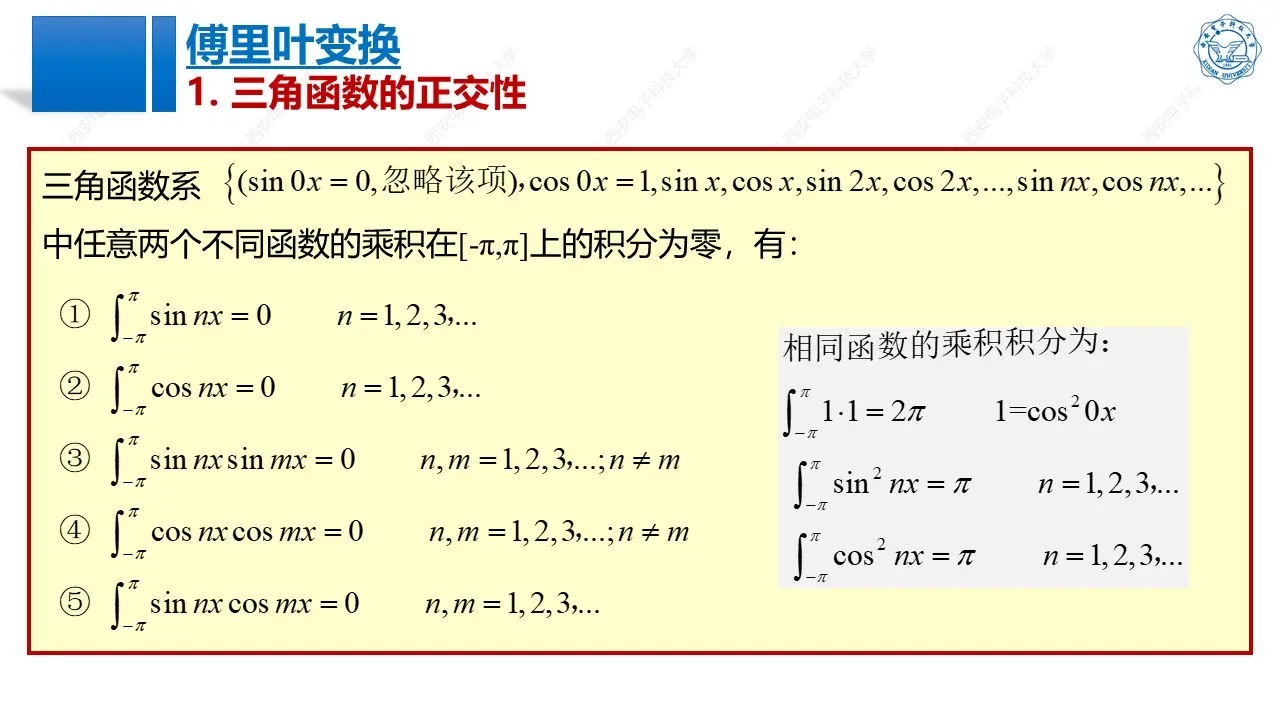
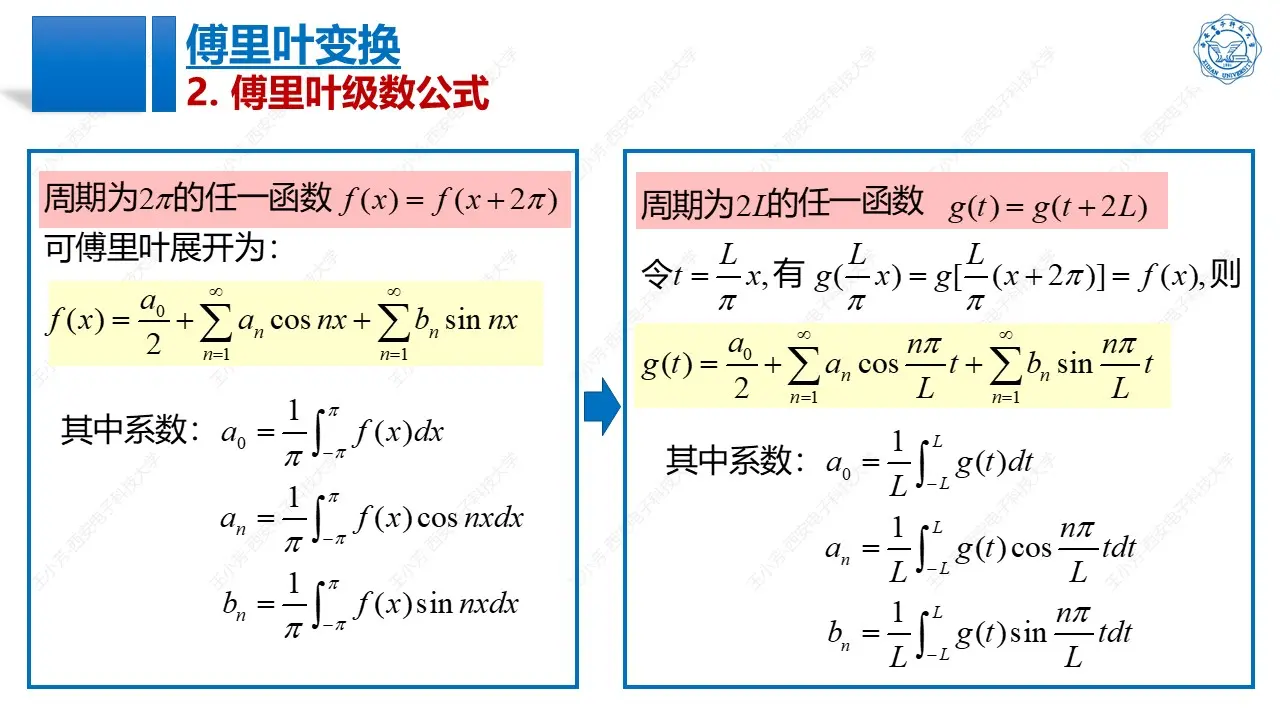
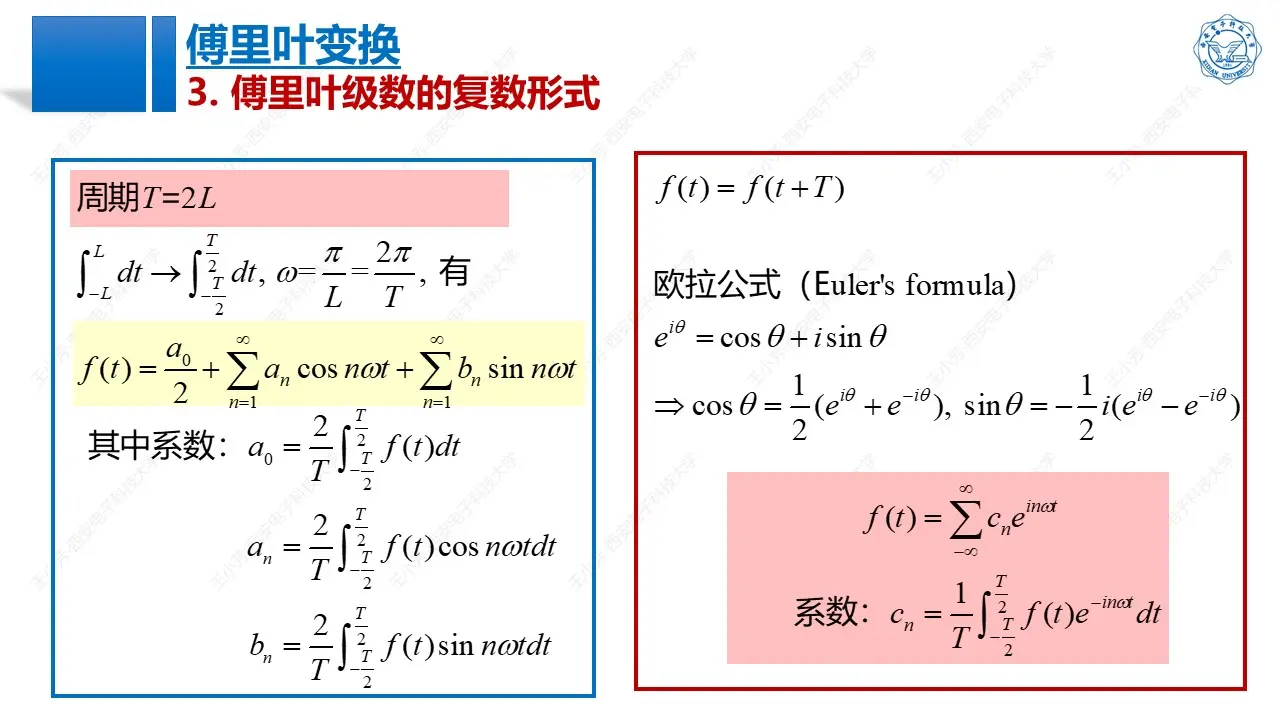
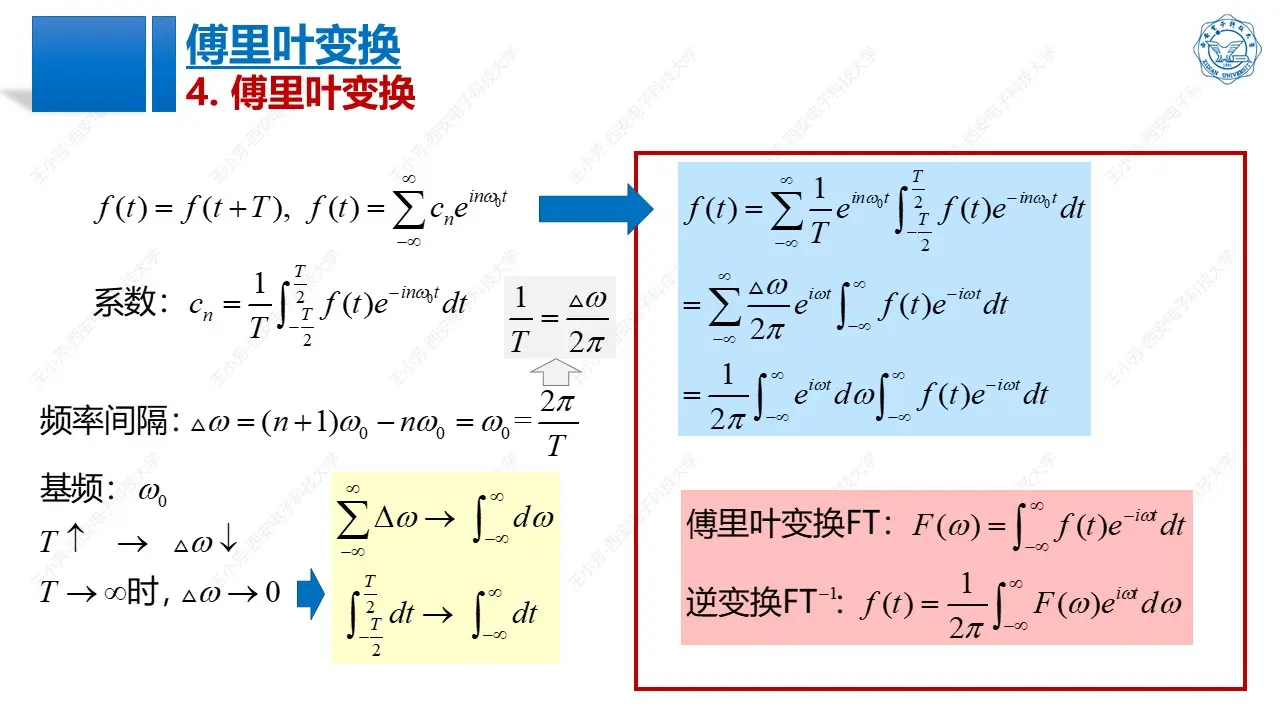

<style>
img {
    width: 90%;
    padding-left: 5%;
}
</style>

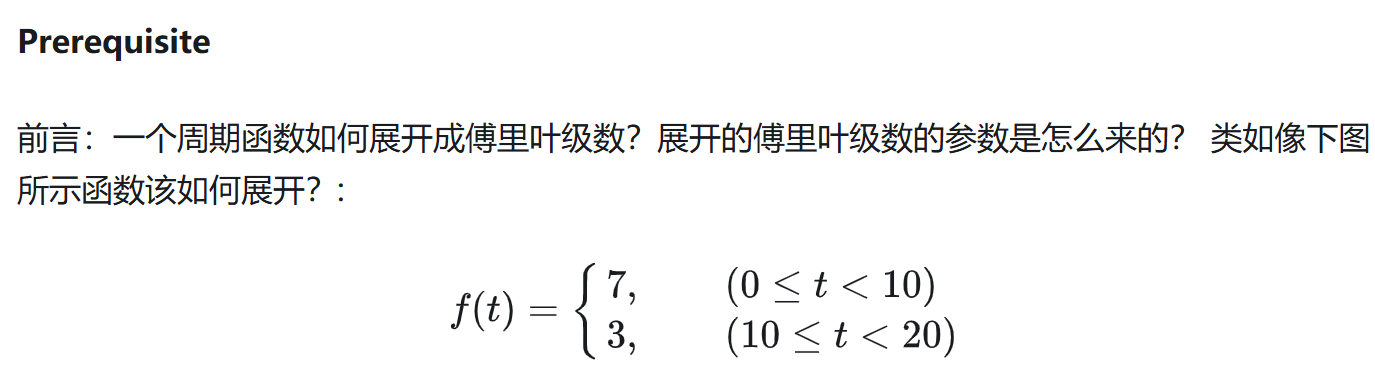


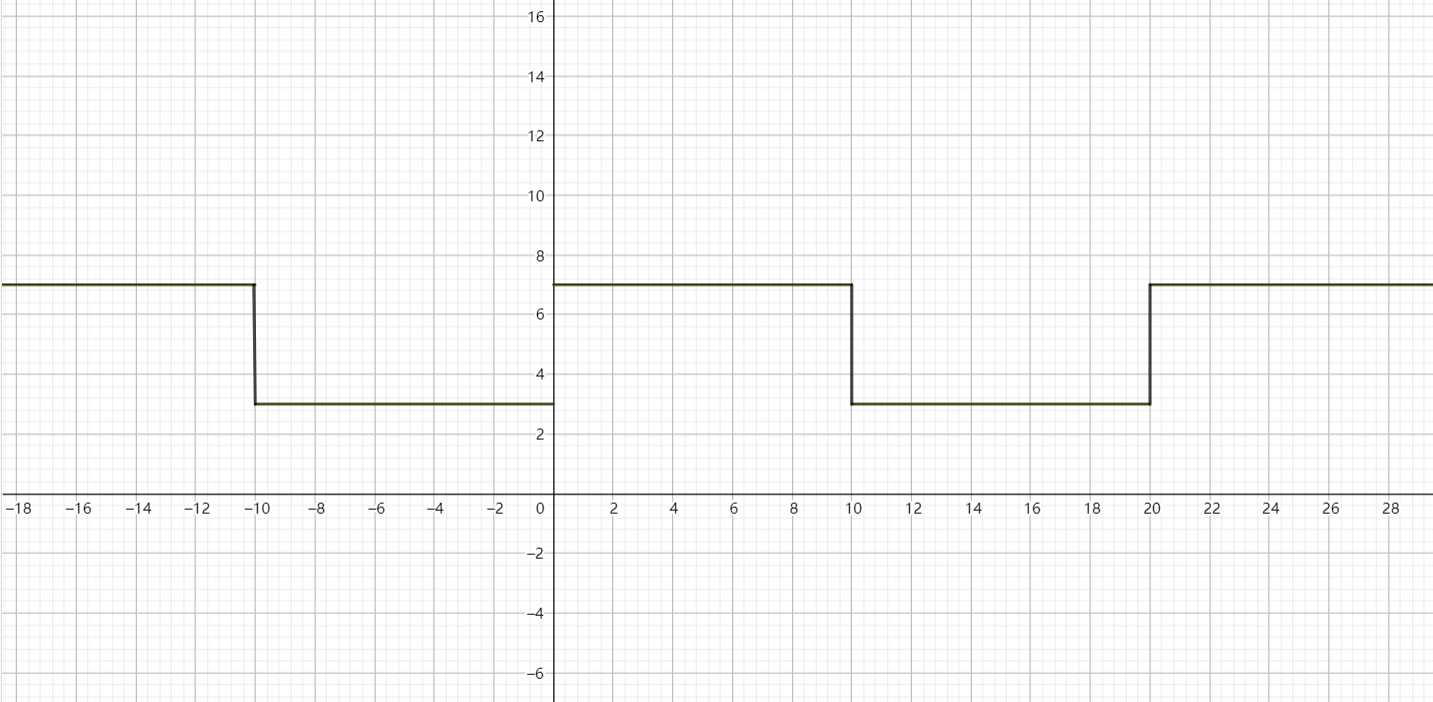

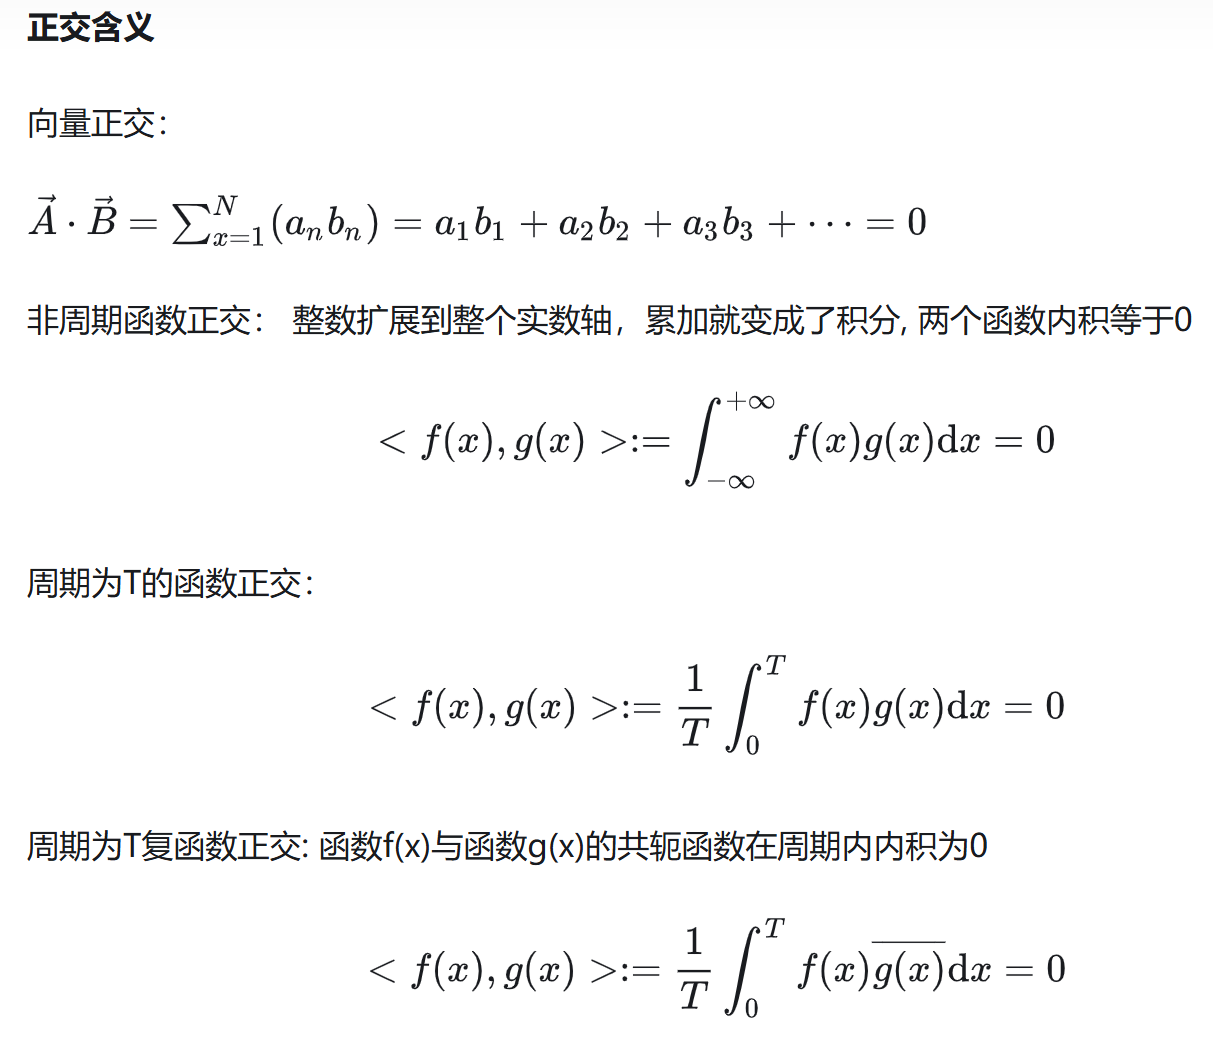
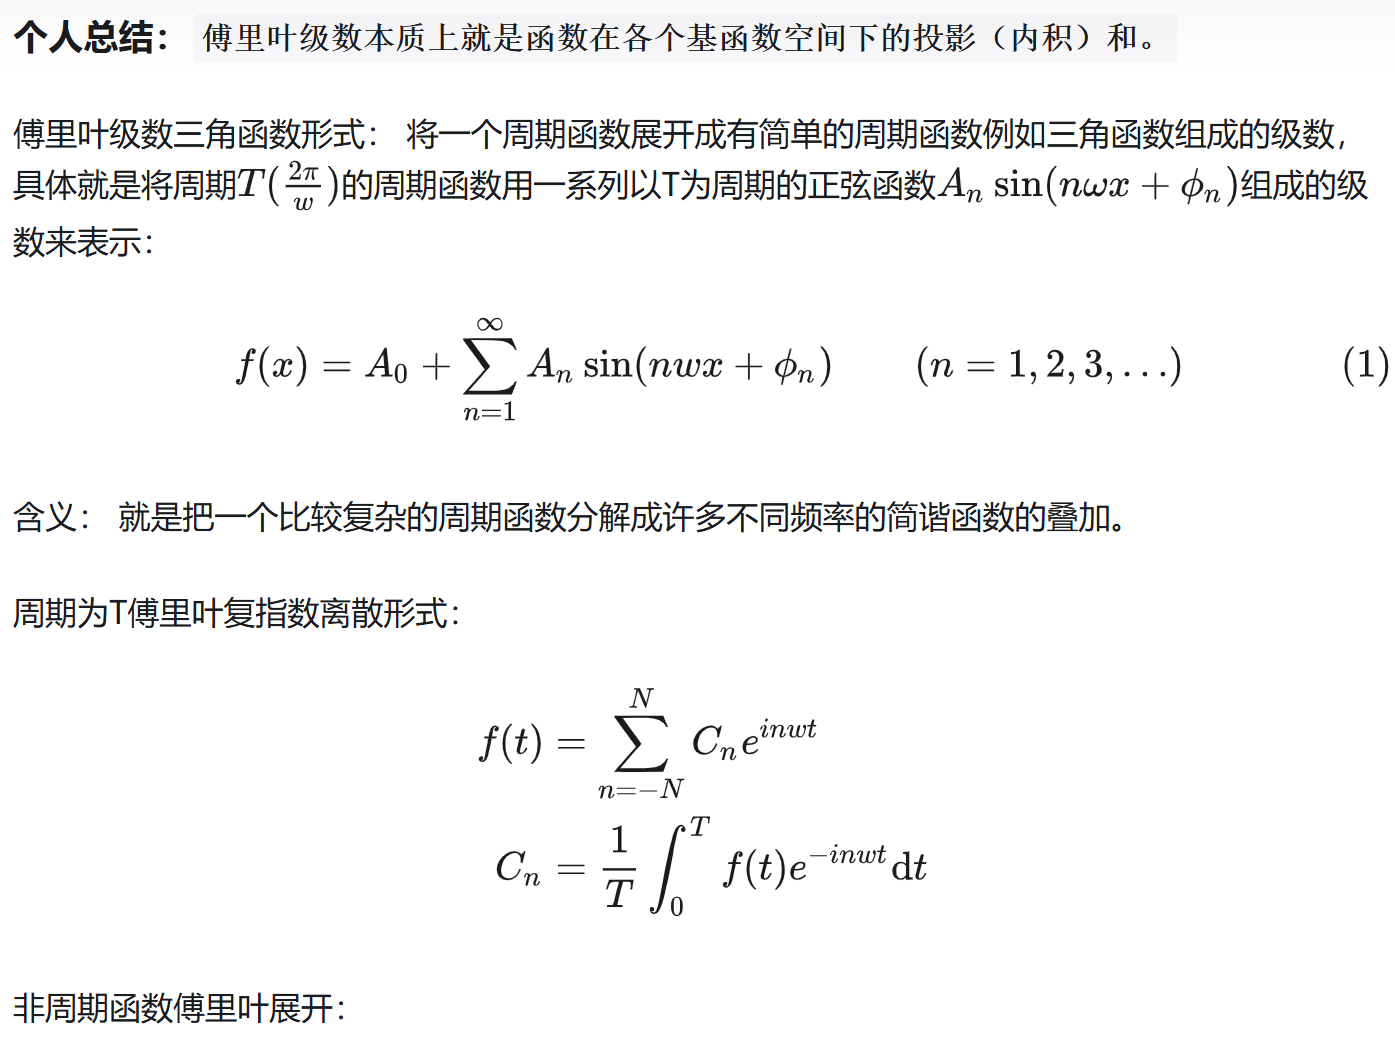
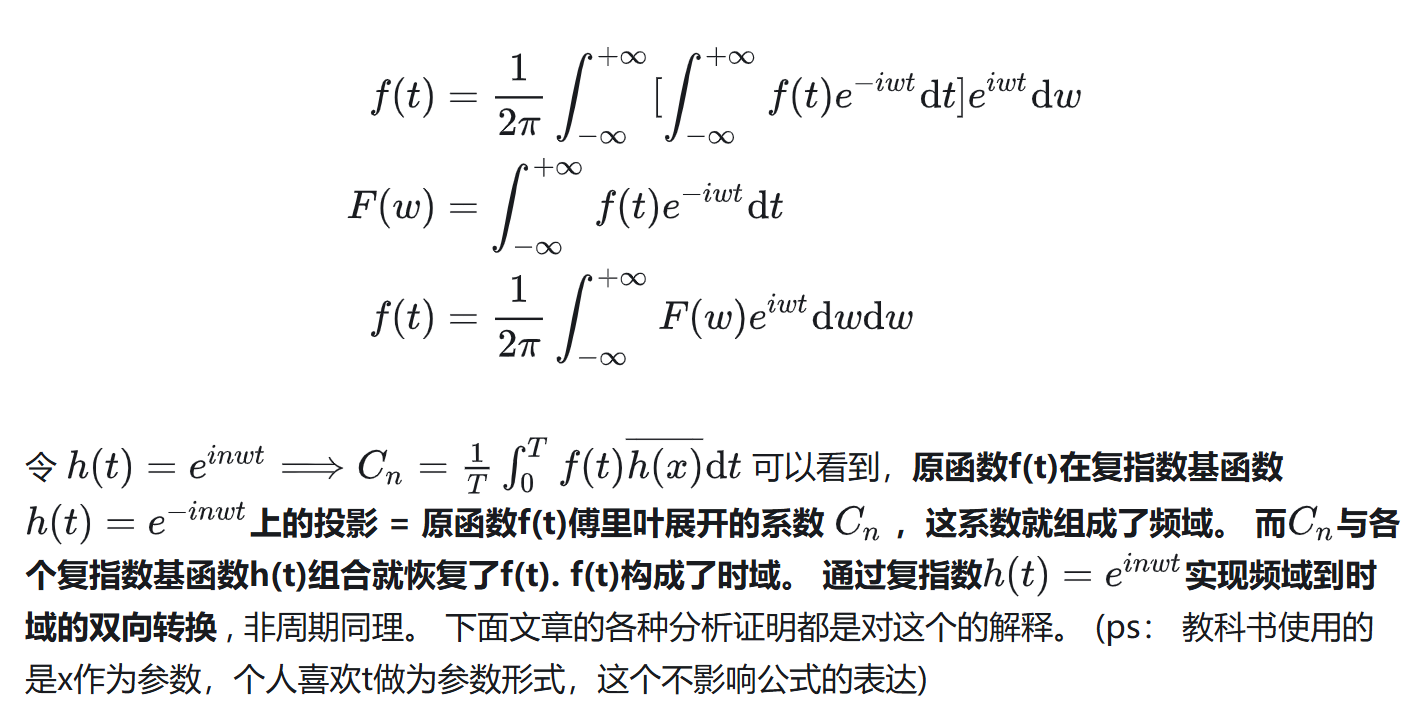
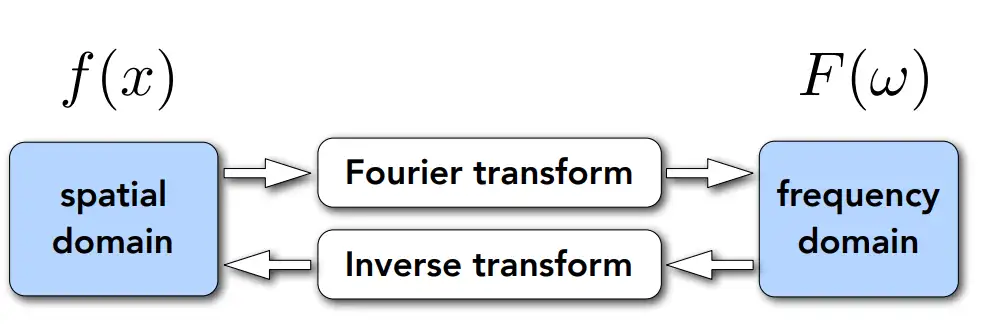
下图比较直观看到转换过程：
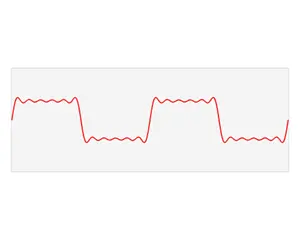
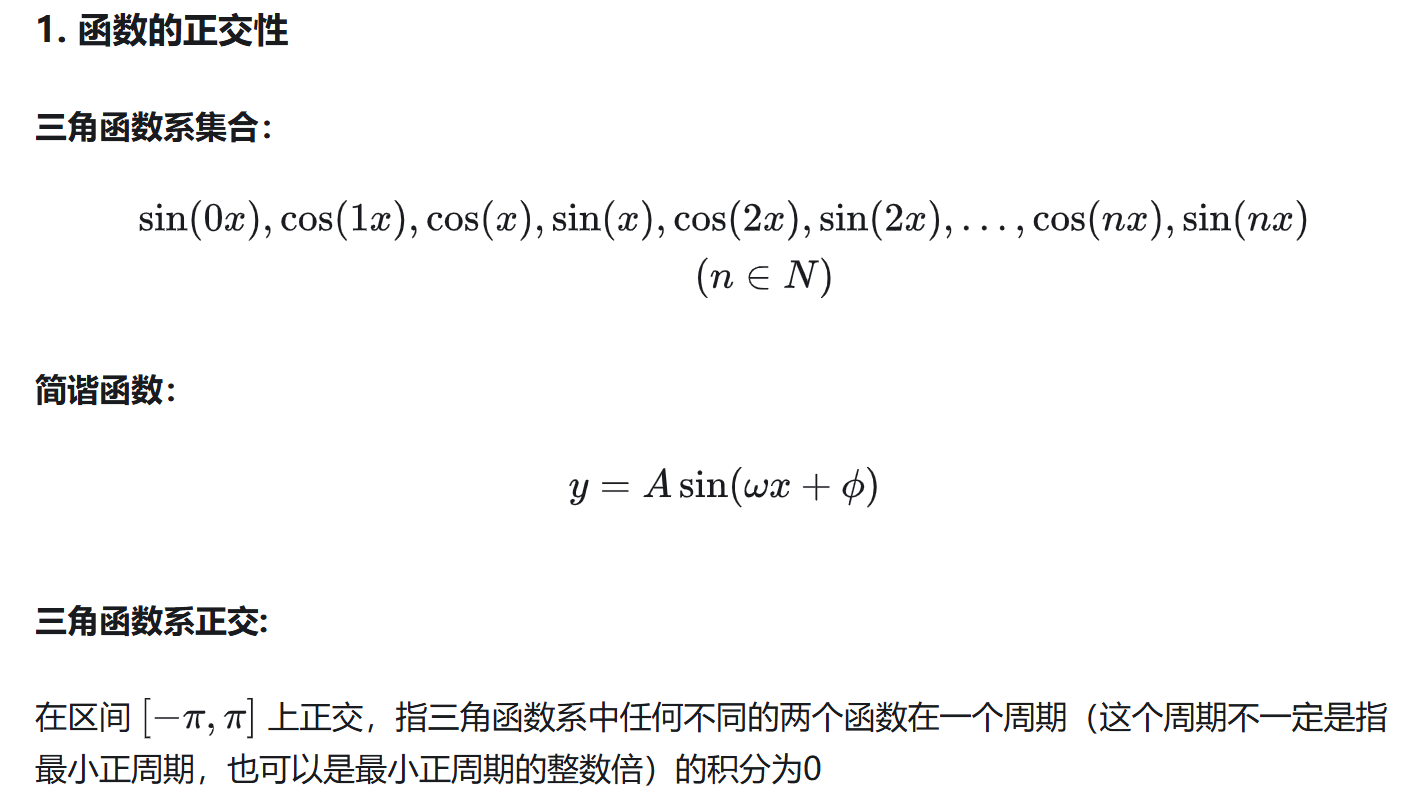
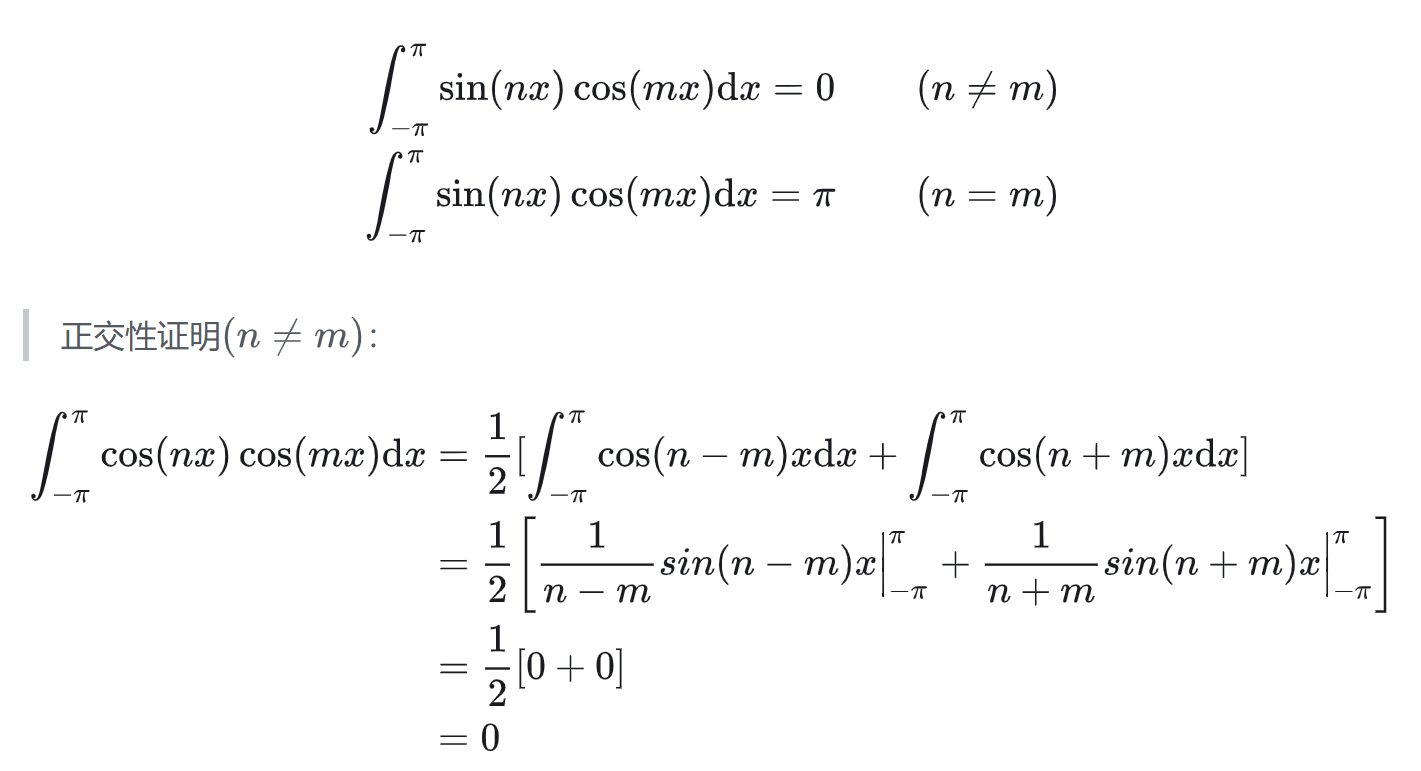
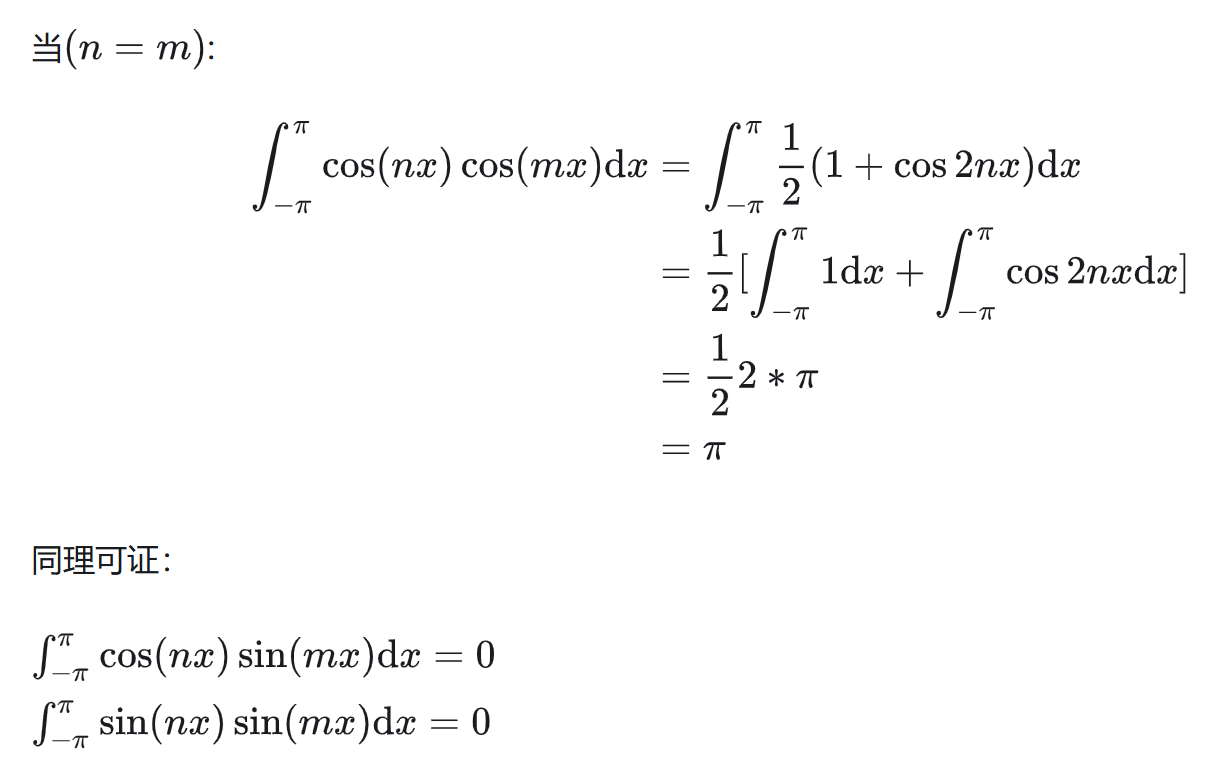
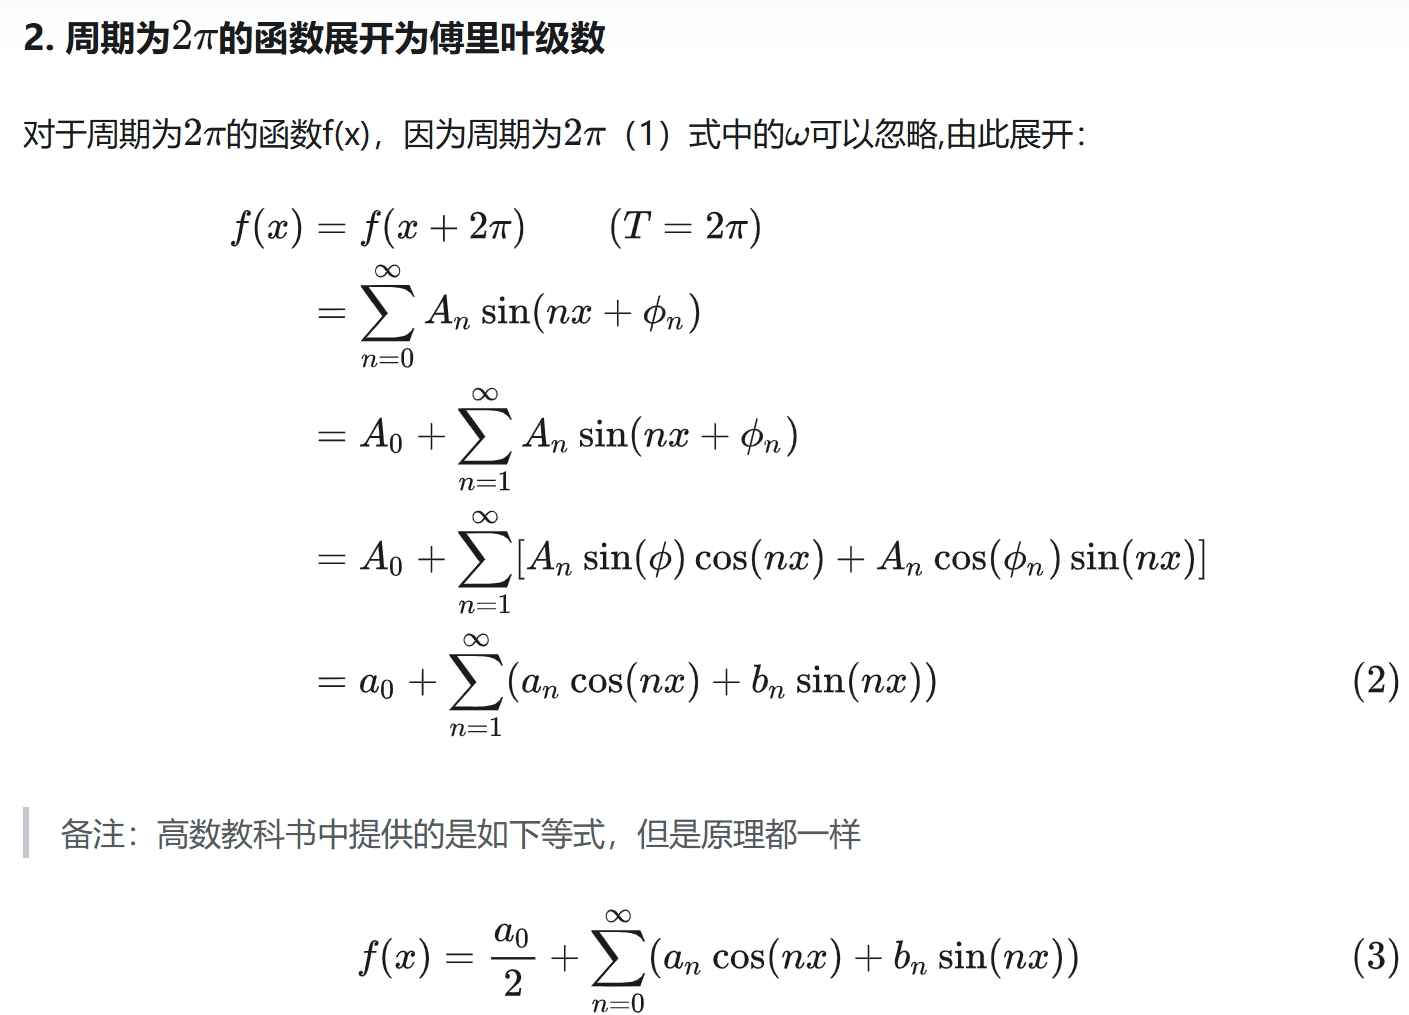
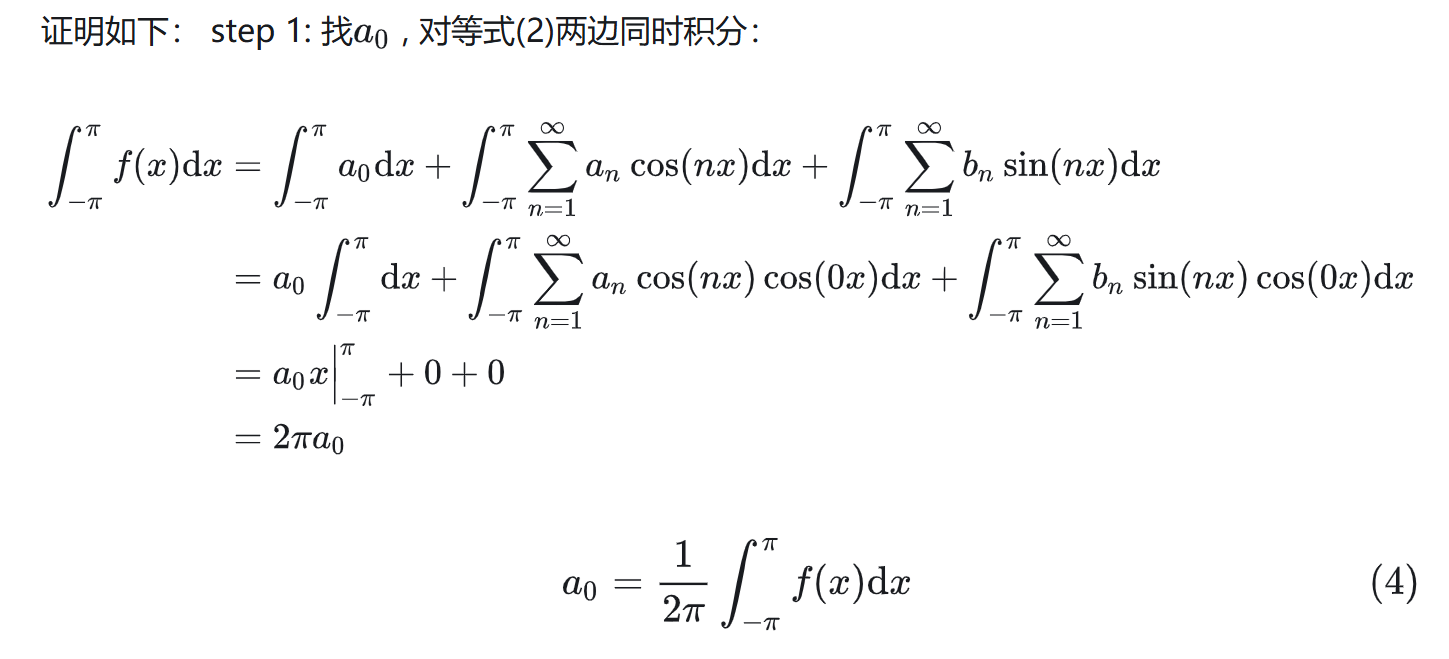
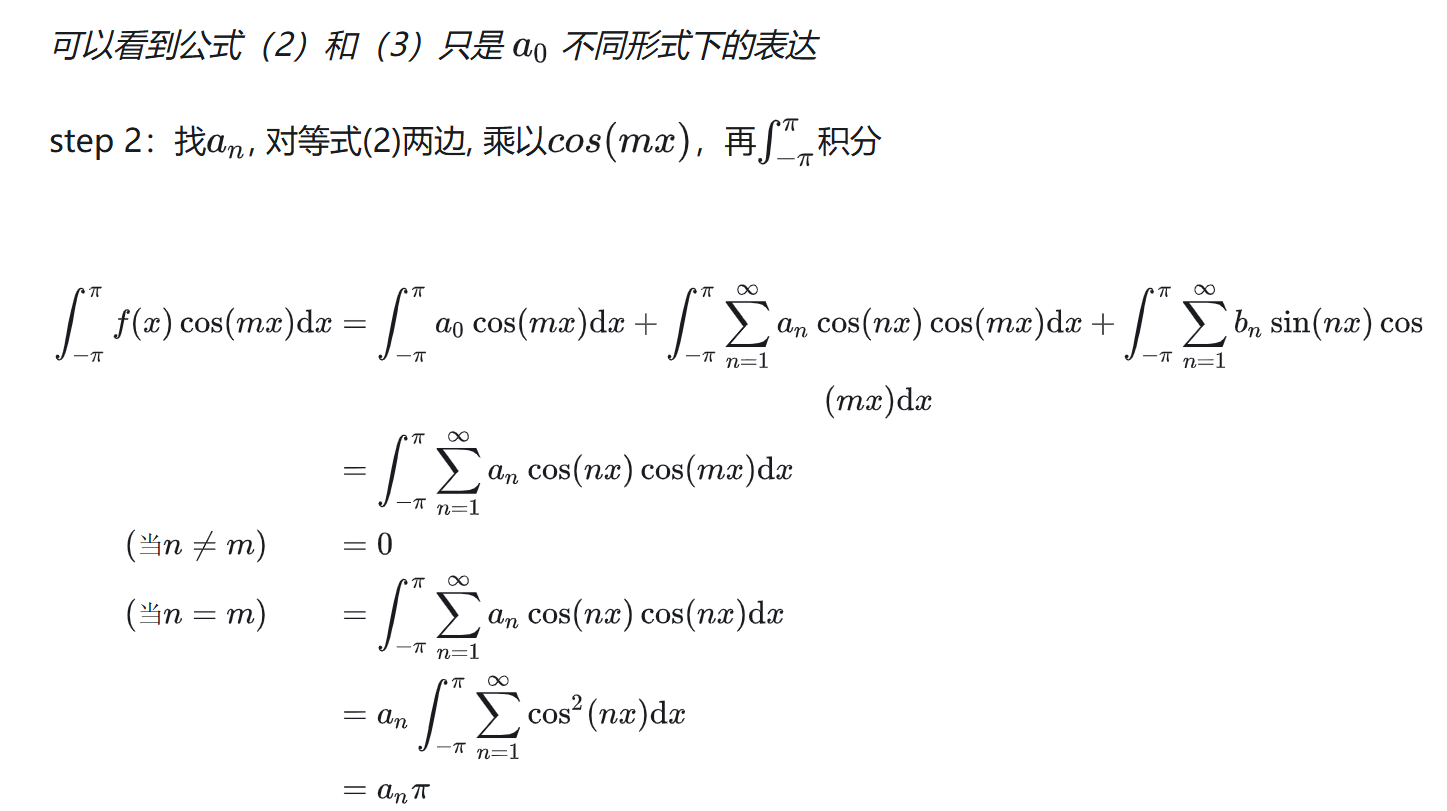
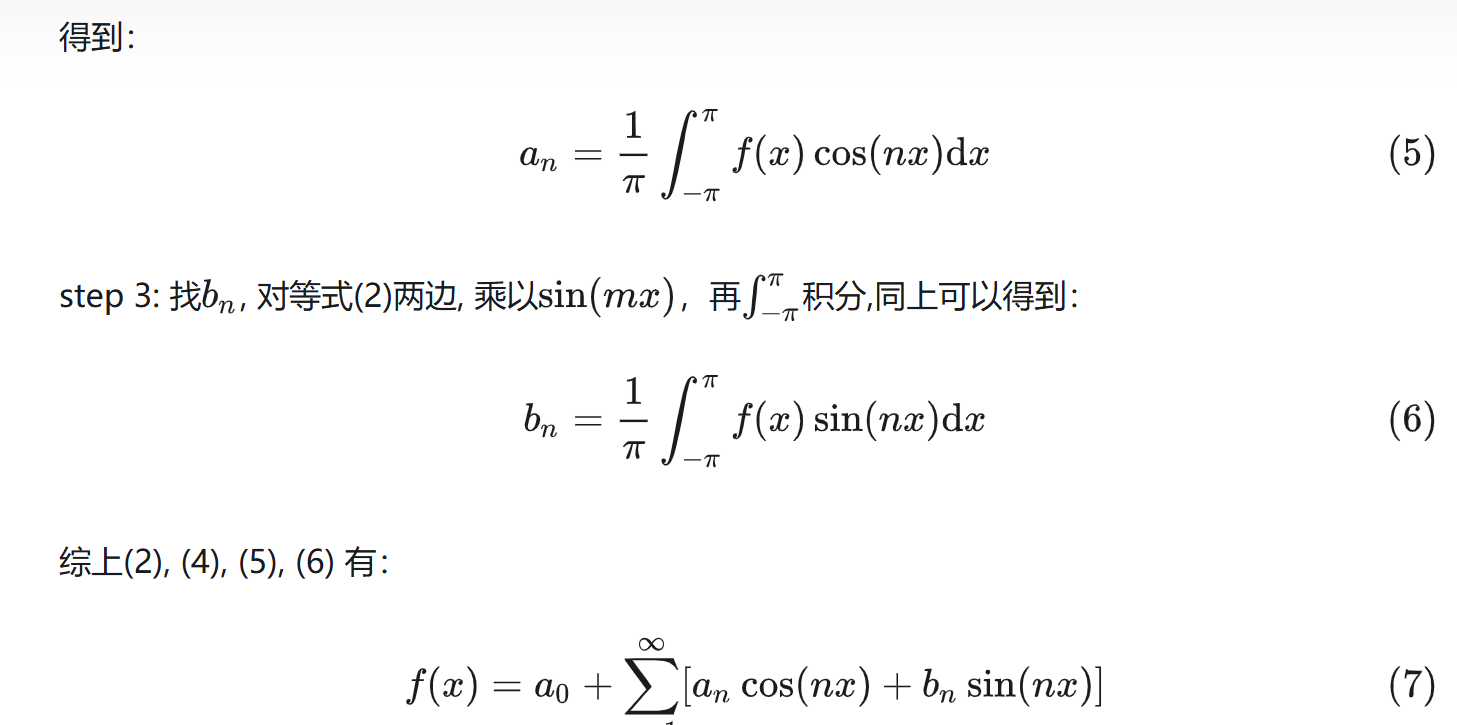
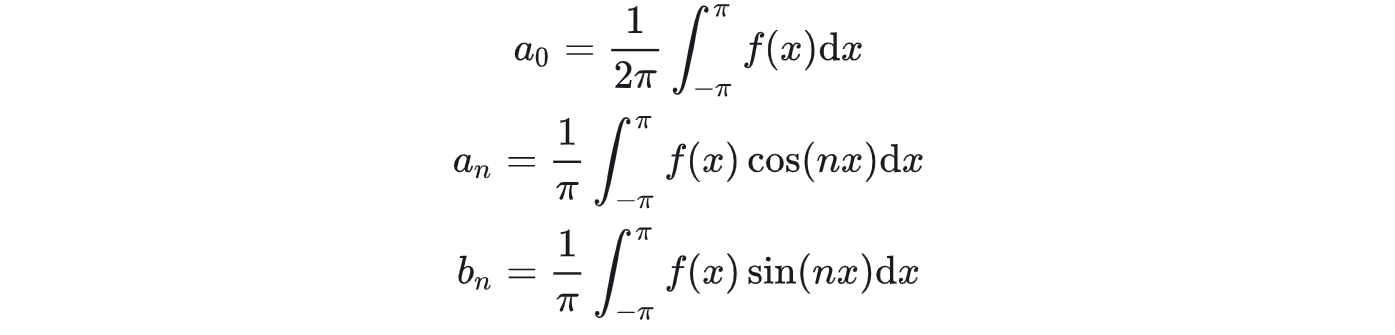
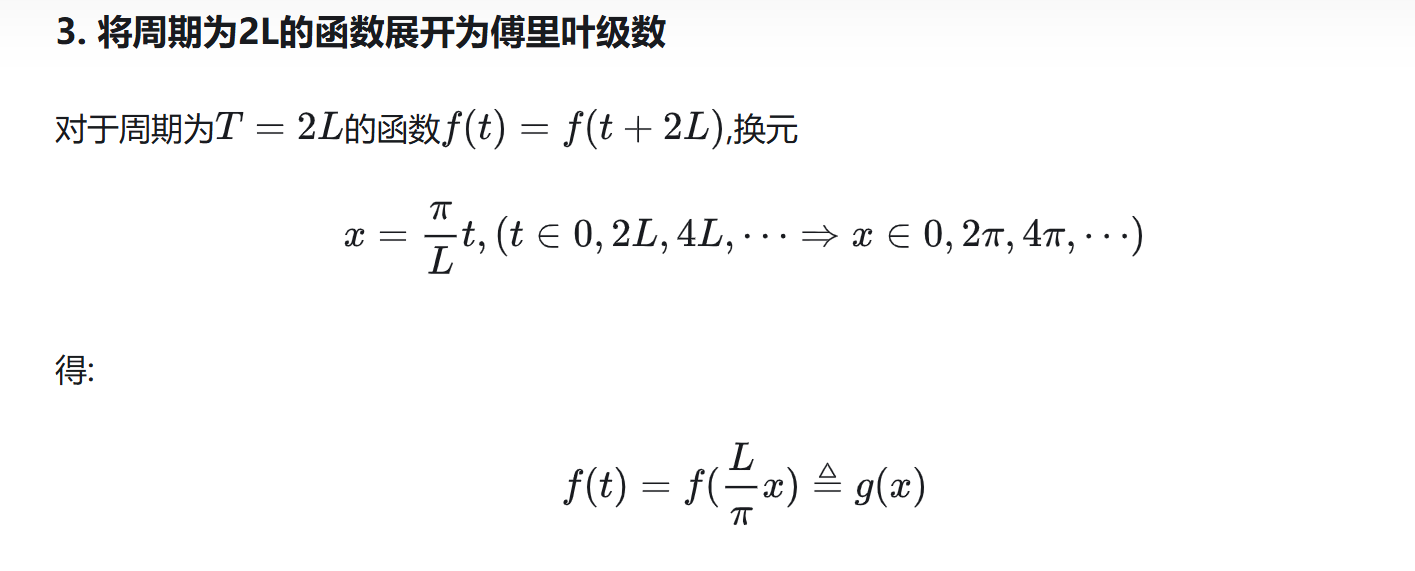
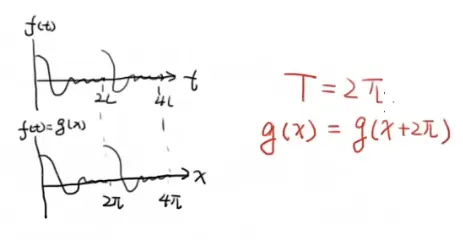

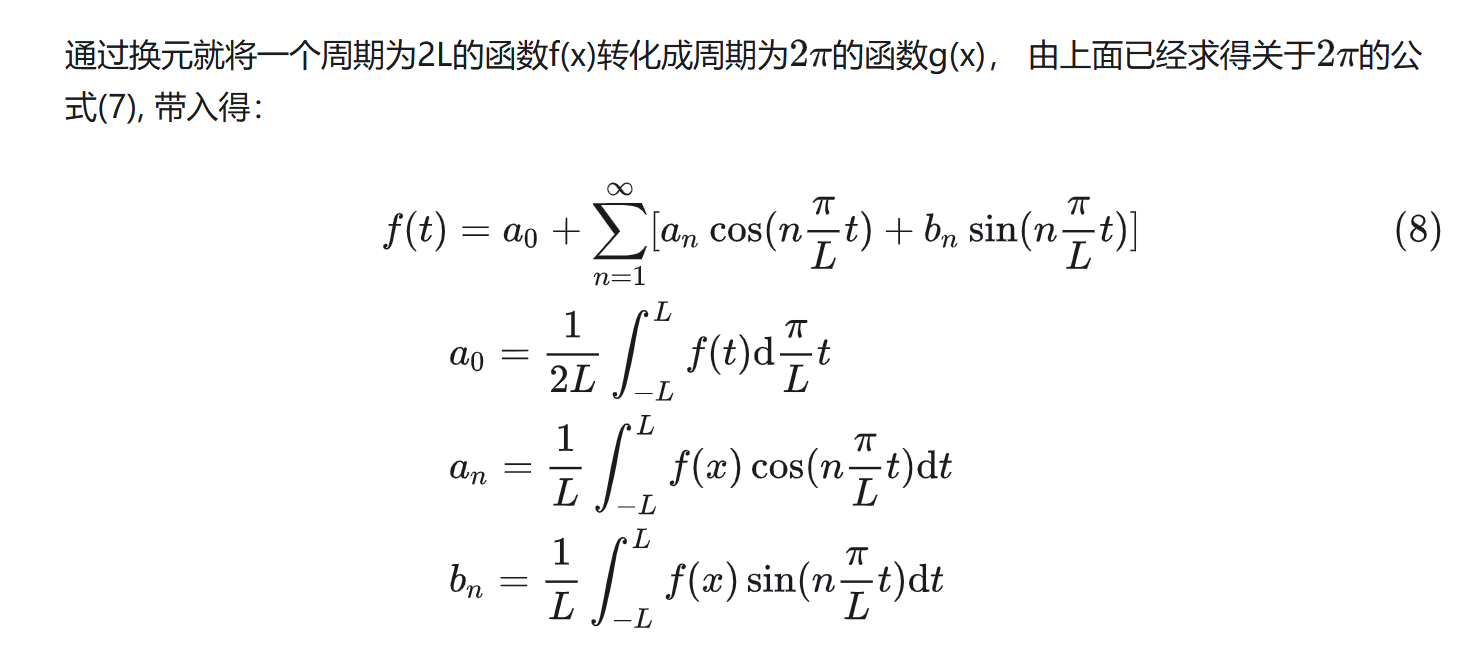
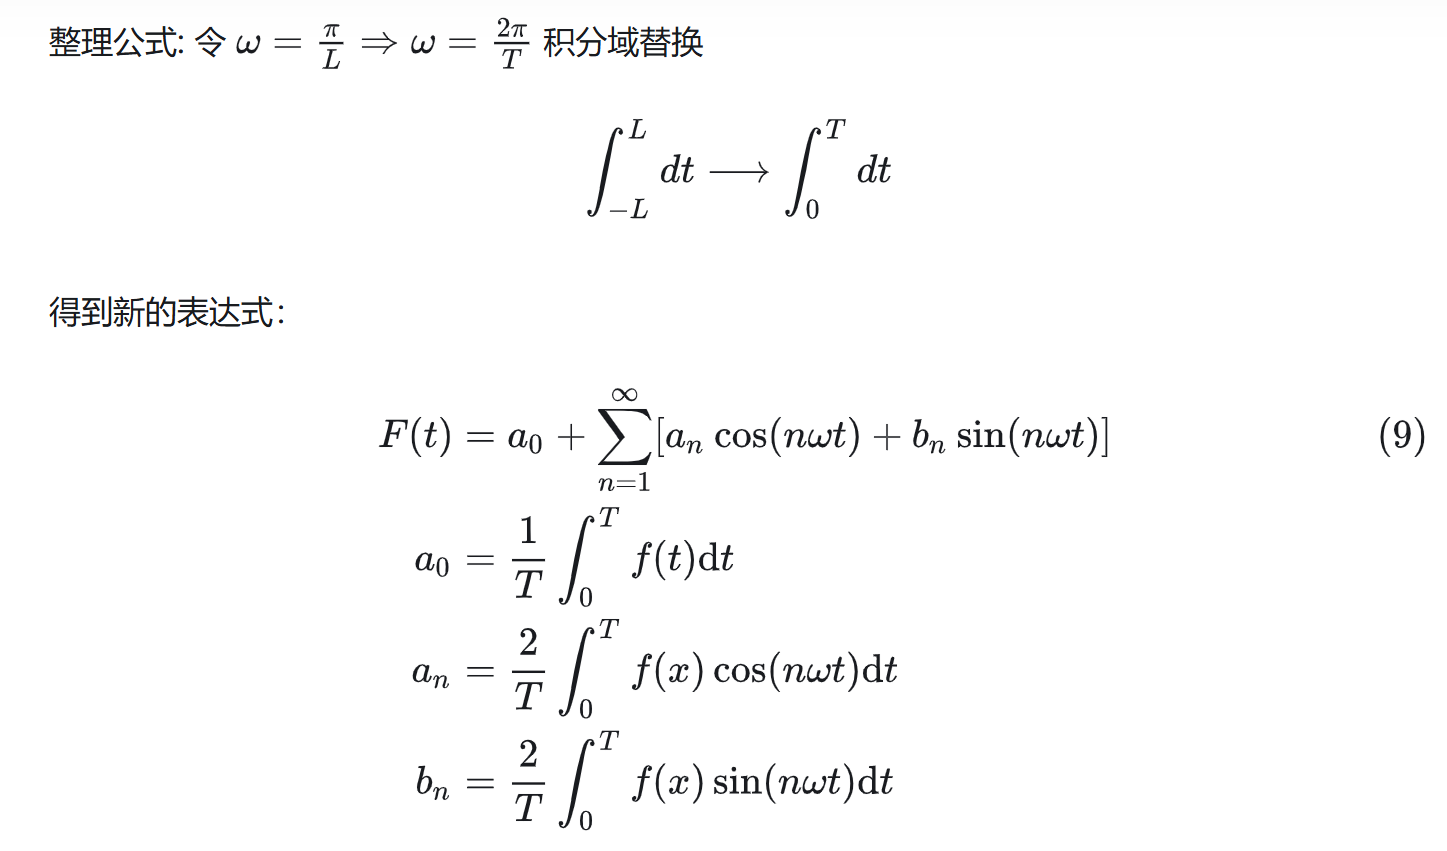
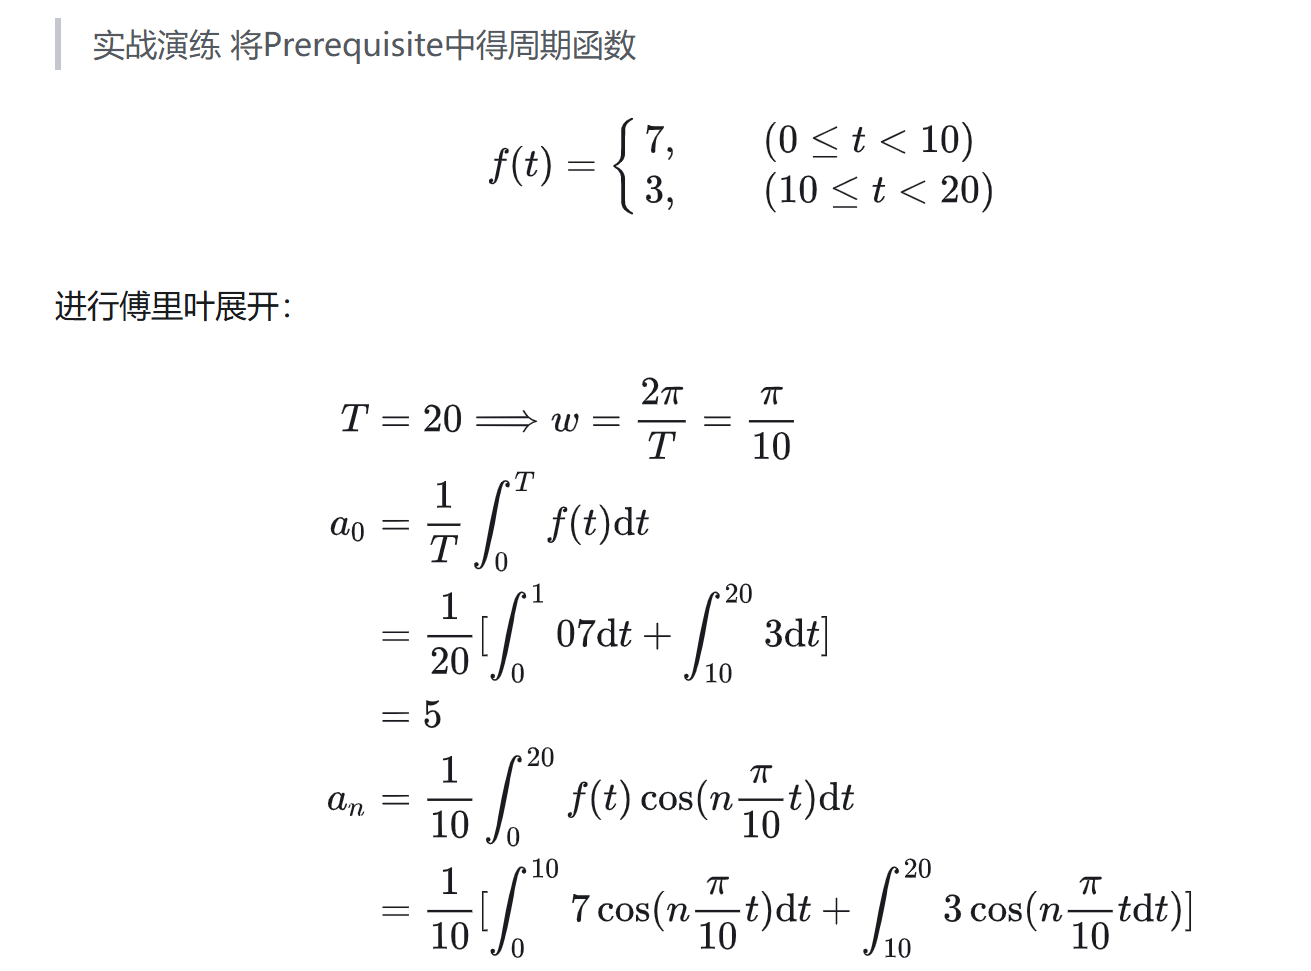
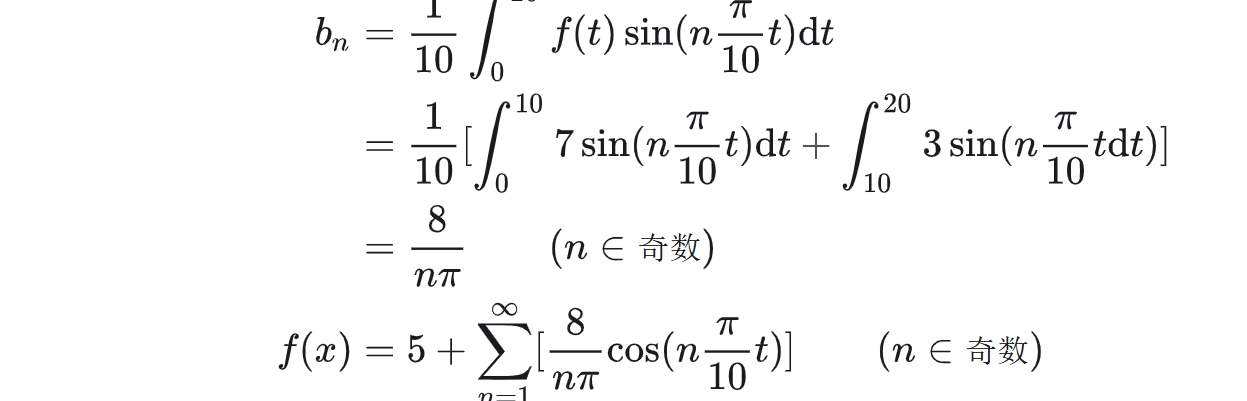
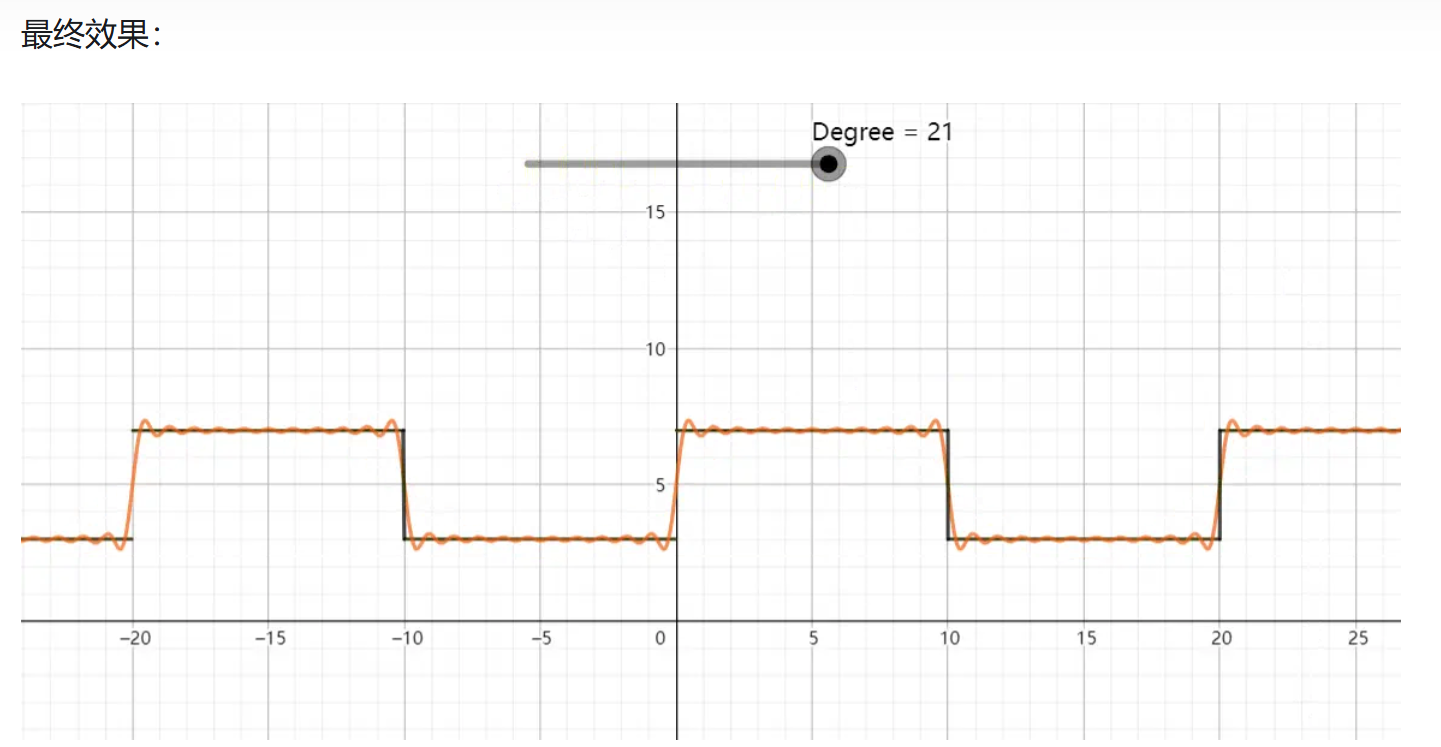


<style>
img {
    width: 90%;
    padding-left: 5%;
}
</style>

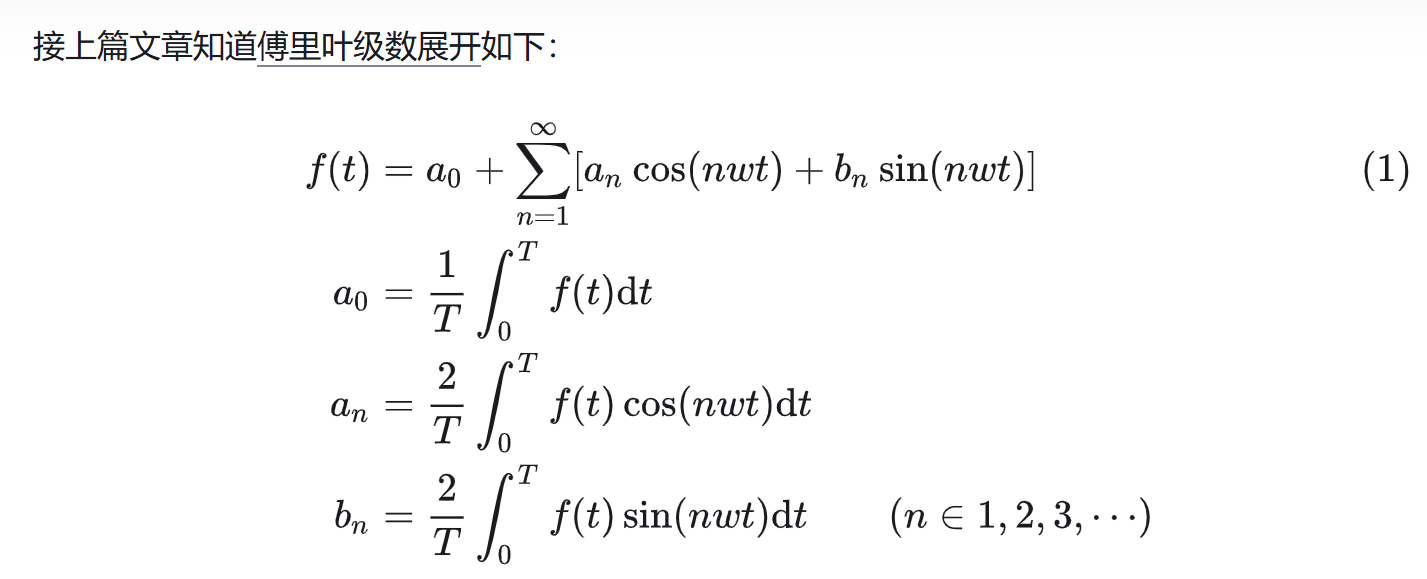
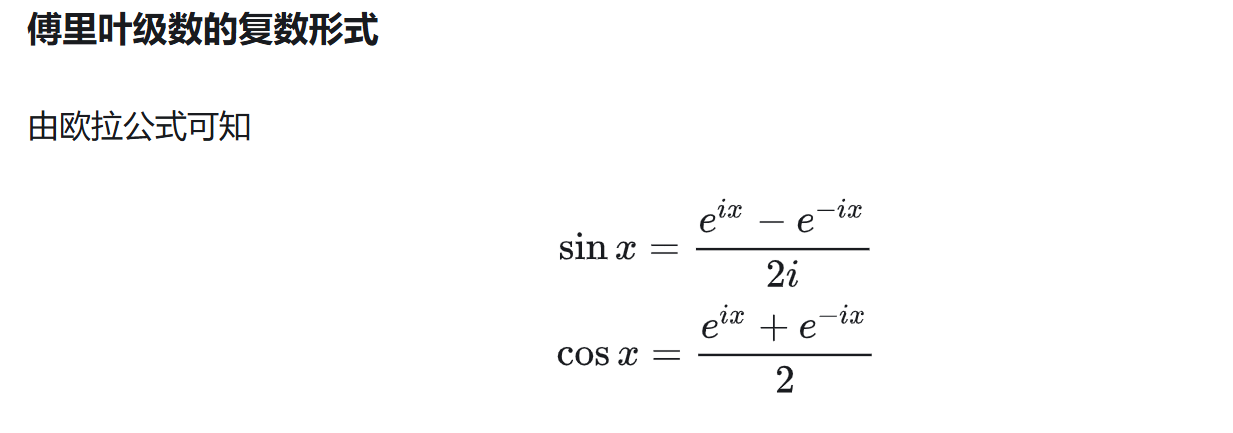
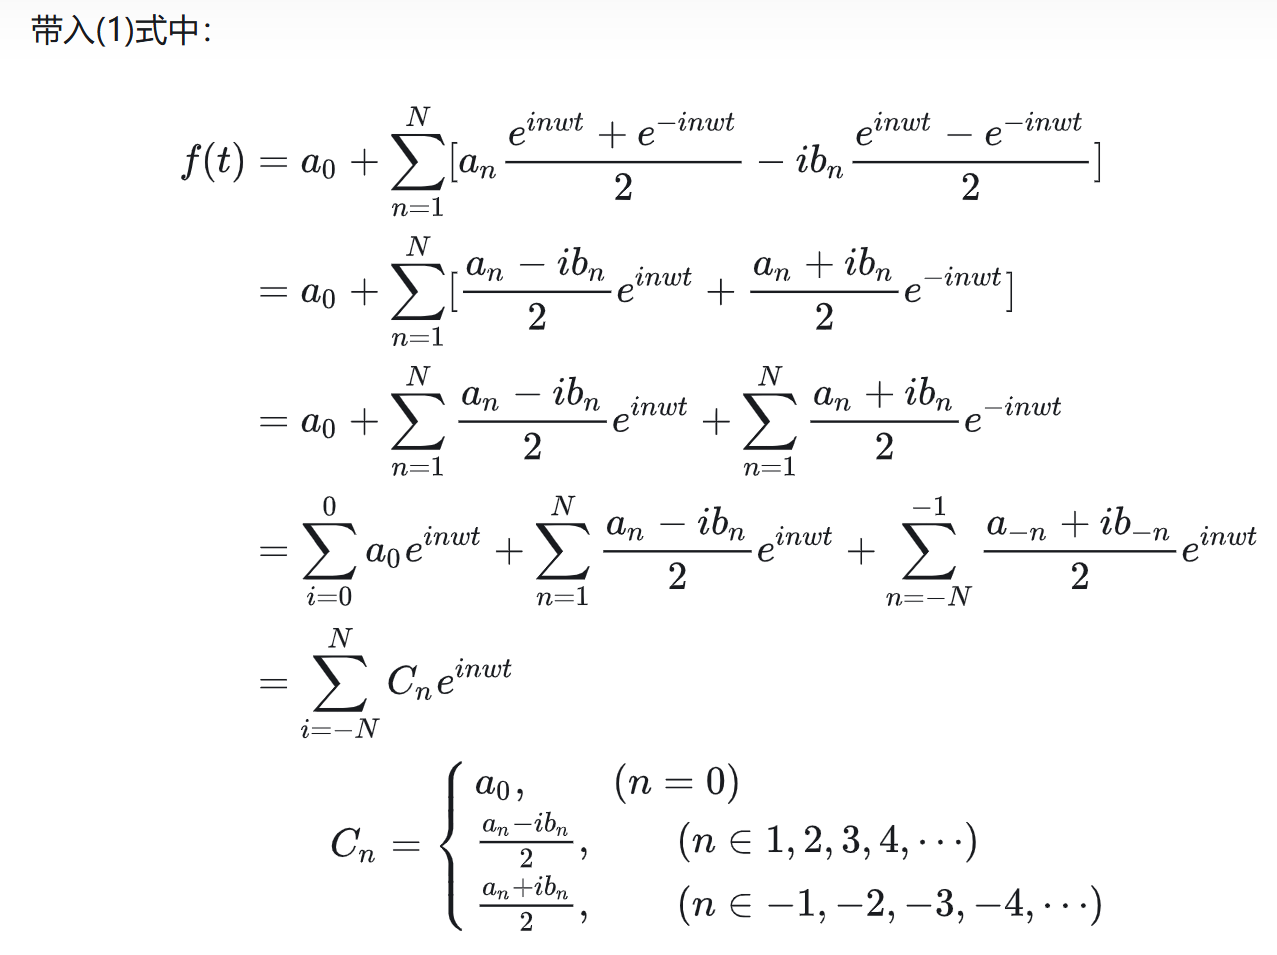
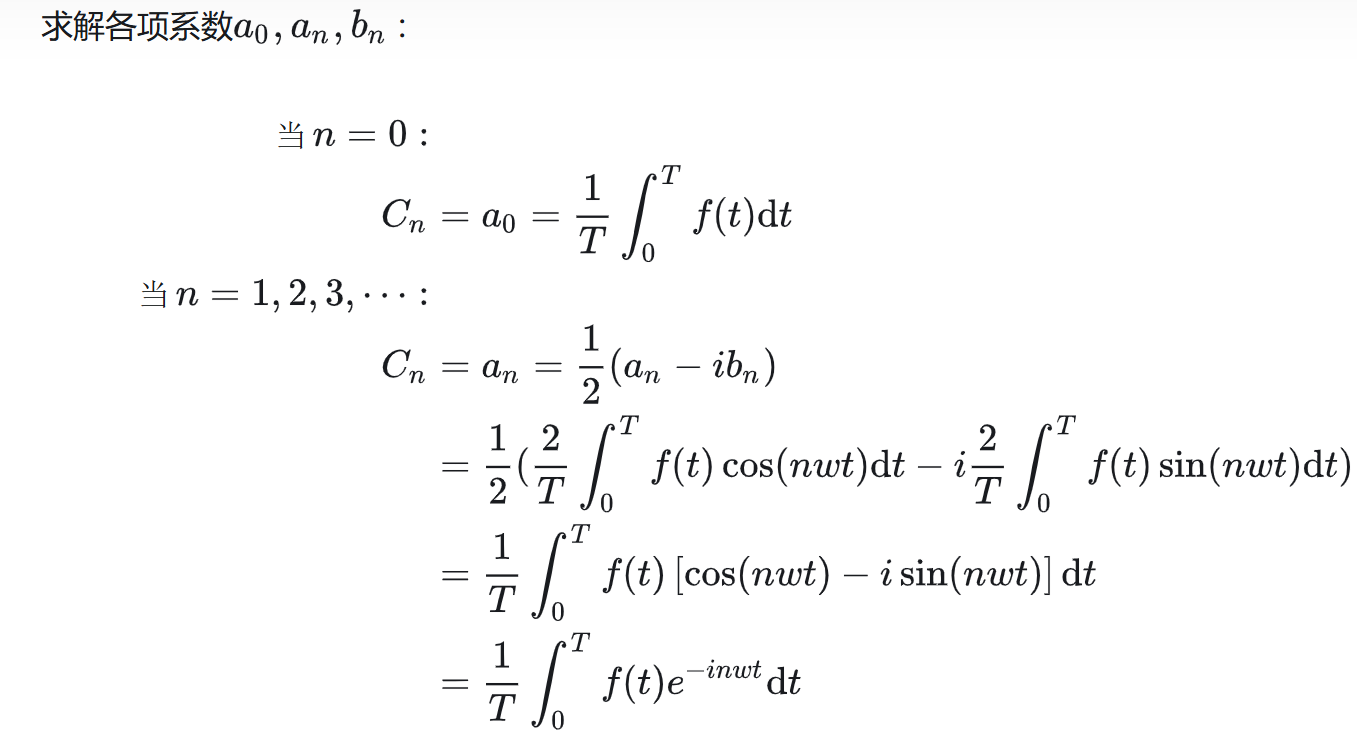
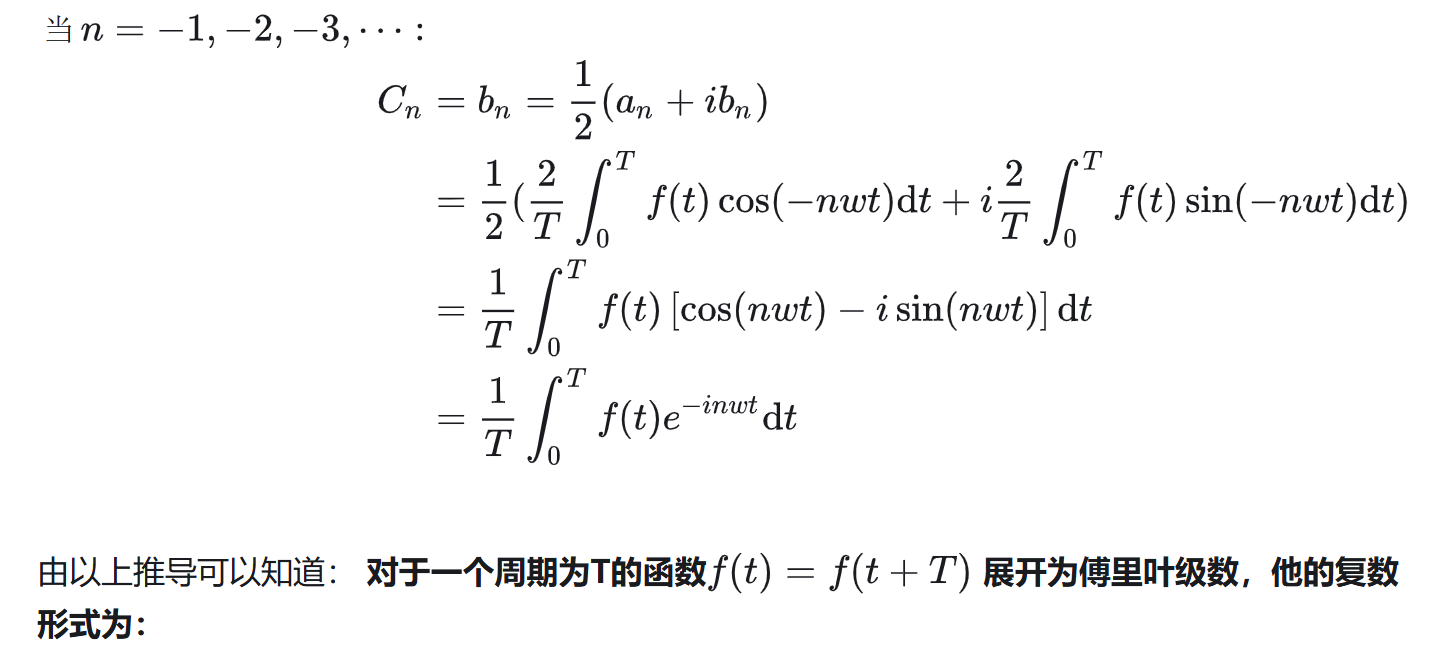
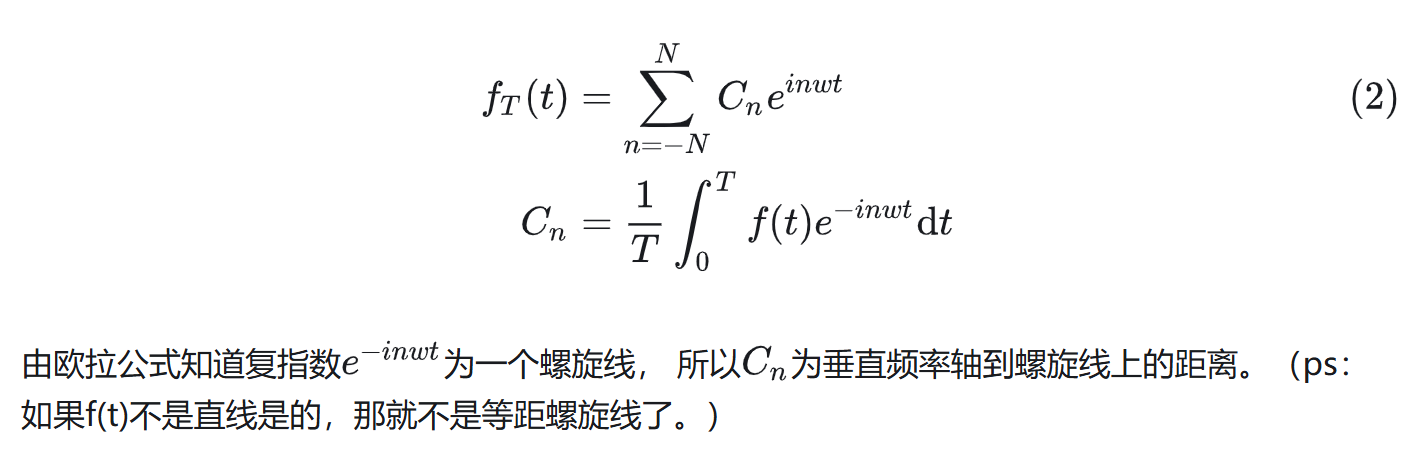
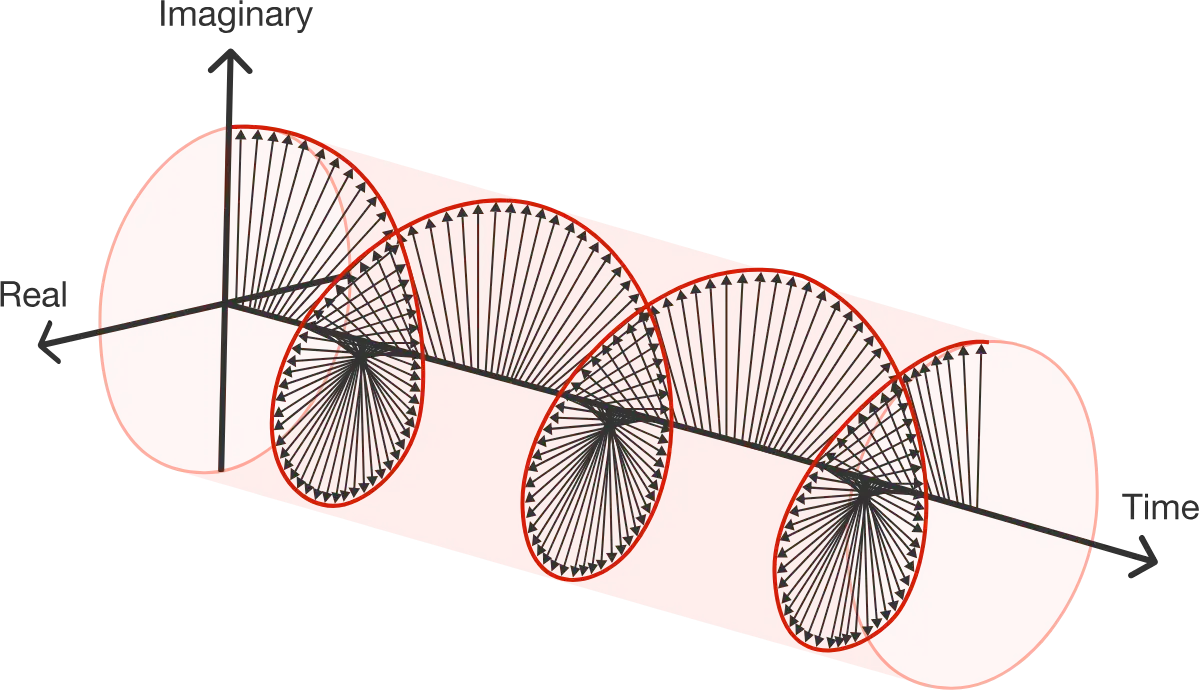
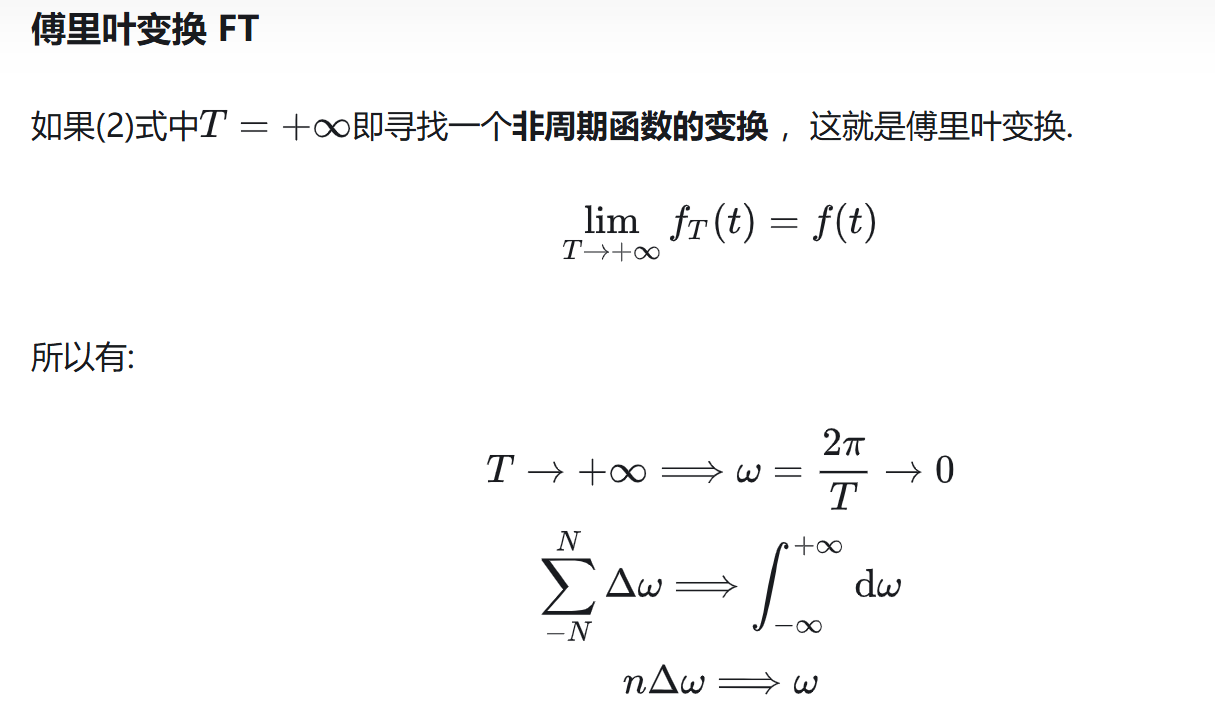
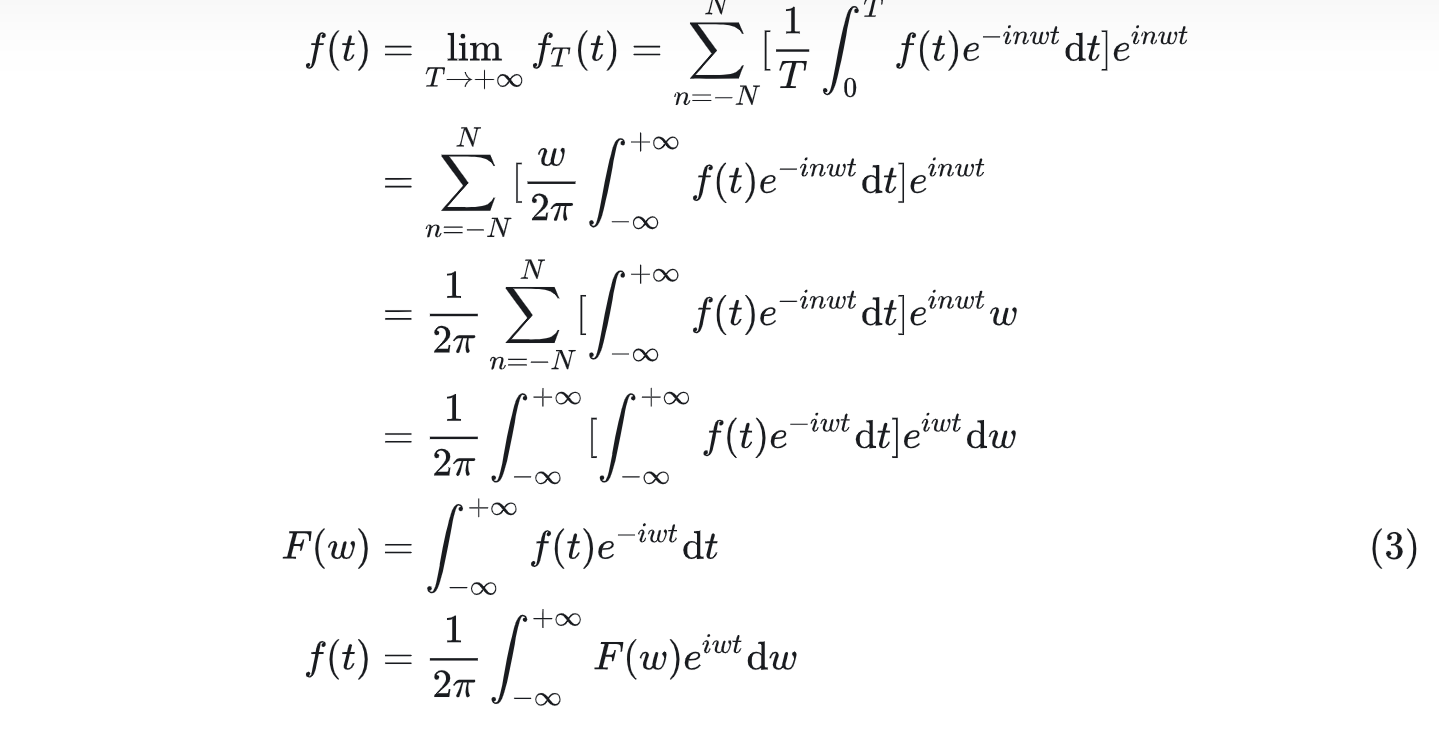
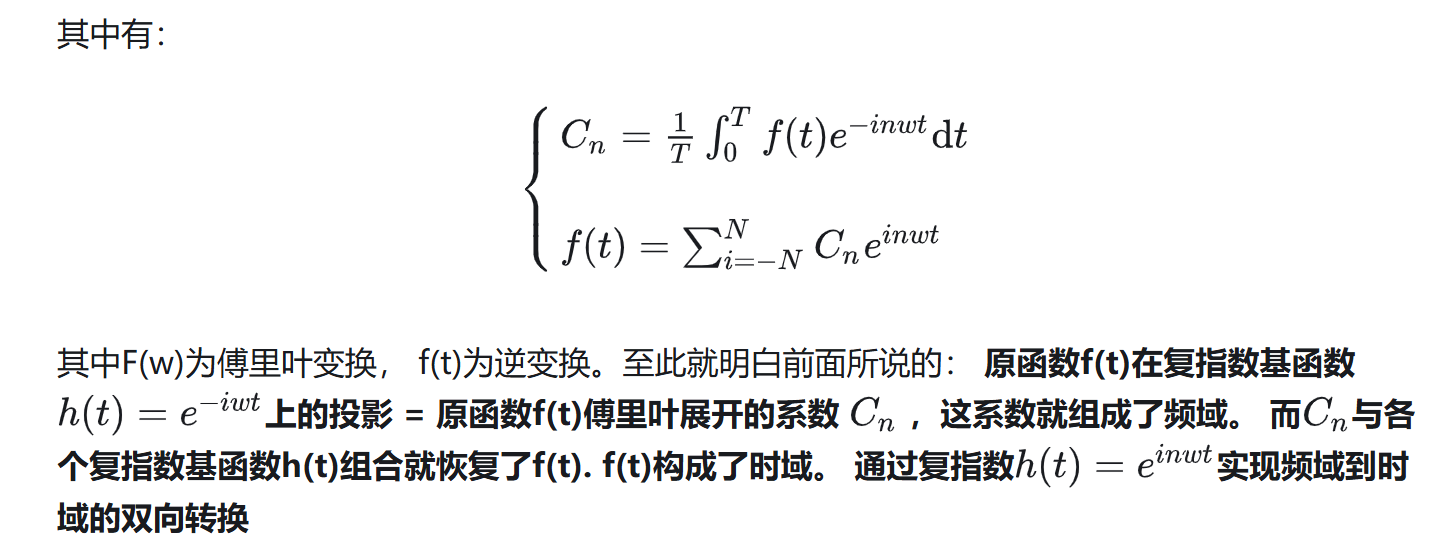
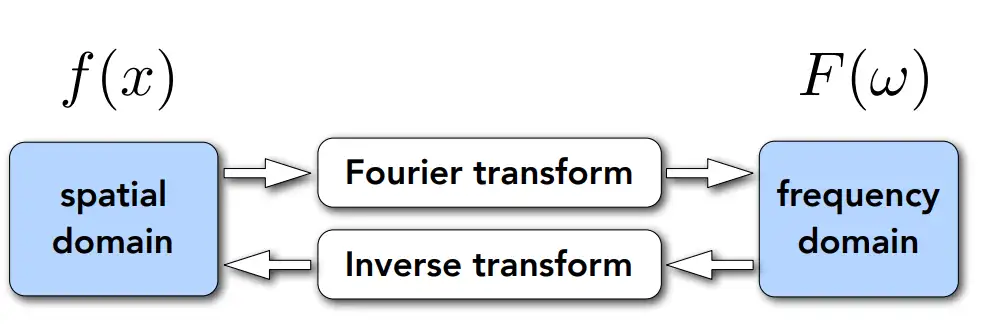

傅里叶变换(Fourier Series)的频谱图

这个图是大佬的这篇傅里叶分析之掐死教程，个人觉得非常形象生动引用下。
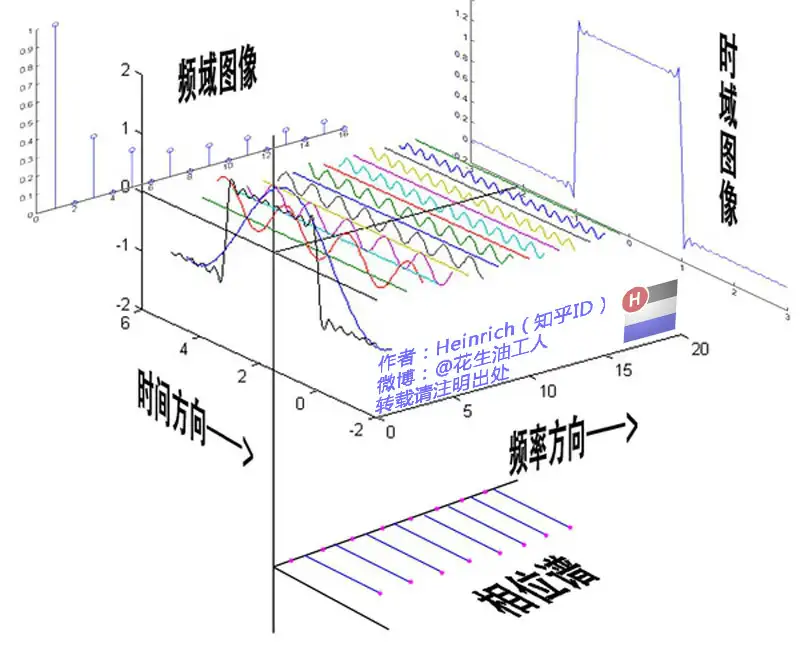


## DFT and FFT

在信号处理和数字信号处理（DSP）领域，"sampling rate"（采样率）和 "sample frequencies"（样本频率）是两个重要但不同的概念。以下是对这两个术语的详细解释及其区别：

### Sampling Rate（采样率）

**定义**：
- 采样率是指每秒钟对连续信号进行采样的次数。它通常以赫兹（Hz）为单位表示。

**作用**：
- 采样率决定了数字信号的时间分辨率。较高的采样率可以捕捉到更多的信号细节，而较低的采样率则会损失部分信号信息。

**公式**：
- 如果采样时间间隔为 $T_s$（秒），则采样率 $f_s$ 为：
  $$ f_s = \frac{1}{T_s} $$

**示例**：
- 音频CD的标准采样率是44.1 kHz，这意味着每秒采样44100次。

### Sample Frequencies（样本频率）

**定义**：
- 样本频率通常是指在离散傅里叶变换（DFT）或快速傅里叶变换（FFT）中，离散信号中的频率分量。这些频率分量是离散频谱中的频率点。

**作用**：
- 样本频率用于分析离散信号的频谱特性。通过DFT/FFT，可以将时间域信号转换为频域信号，得到信号在不同频率上的幅度和相位信息。

**计算**：
- 对于一个长度为 $N$ 的离散信号，其样本频率 $f_k$ 为：
  $$ f_k = \frac{k \cdot f_s}{N} $$
  其中 $k = 0, 1, 2, \ldots, N-1$，$f_s$ 是采样率。

**示例**：
- 如果采样率 $f_s$ 为44.1 kHz，且信号长度 $N$ 为1024，那么样本频率的范围为0到44.1 kHz，对应的频率分量为：
  $$ f_k = \frac{k \cdot 44100}{1024} \quad \text{(Hz)} $$

### 区别

1. **定义和用途**：
   - **采样率**：描述的是对连续信号进行采样的频率，用于从连续信号生成离散信号。
   - **样本频率**：描述的是离散信号中各个频率分量的频率，用于频域分析。

2. **单位**：
   - **采样率**：单位是赫兹（Hz），表示每秒采样的次数。
   - **样本频率**：通常也是赫兹（Hz），表示离散频谱中的频率点。

3. **范围**：
   - **采样率**：是一个固定值，决定了信号的时间分辨率。
   - **样本频率**：是一个数组或序列，表示离散信号的频率分量，范围从0到采样率的一半（奈奎斯特频率）。

### 总结

- **采样率**（sampling rate）是对连续信号进行采样的频率，决定了数字信号的时间分辨率。
- **样本频率**（sample frequencies）是离散信号中各个频率分量的频率，用于频域分析。

理解这两个概念及其区别对于信号处理尤其是数字信号处理是非常重要的。

## Fourier Transform Code

<https://docs.scipy.org/doc/scipy/tutorial/fft.html



In [1]:
import numpy as np

def fft(x):
    # 计算快速傅里叶变换（FFT）的函数
    # 参数：x - 输入的复数序列
    # 返回值：经过FFT变换后的复数序列
    N = len(x)
    if N <= 1:
        return x
    even = fft(x[0::2])
    odd = fft(x[1::2])
    T = [np.exp(-2j * np.pi * k / N) * odd[k] for k in range(N // 2)]
    return [even[k] + T[k] for k in range(N // 2)] + [
        even[k] - T[k] for k in range(N // 2)
    ]

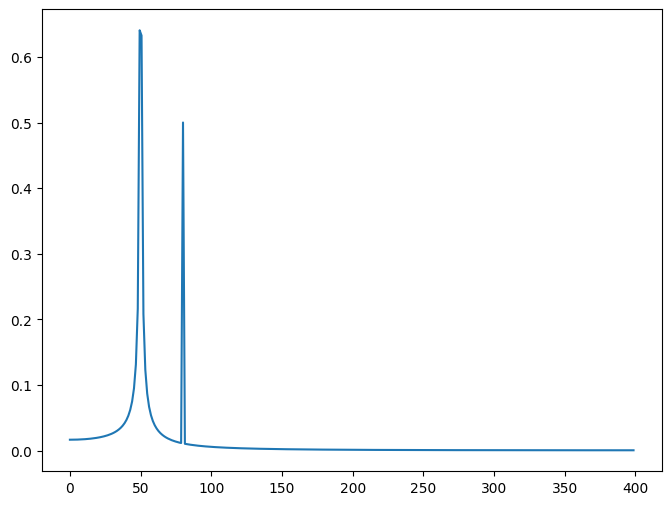

In [3]:
import numpy as np
from torch import nn
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt

# Number of samples
N = 600
# sampe spacing
T = 1 / 800

x = np.linspace(0, N * T, N, endpoint=False)
y = np.sin(50.0 * 2.0 * np.pi * x) + 0.5 * np.sin(80.0 * 2.0 * np.pi * x)
yf = fft(y)

xf = fftfreq(N, T)[:N//2]

fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(xf, 2.0/N * np.abs(yf[:N//2]), '-')

plt.show()

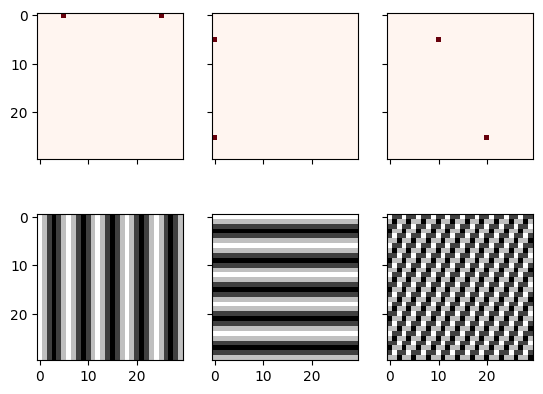

In [4]:
from scipy.fft import ifftn
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

N = 30
f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex="col", sharey="row")
xf = np.zeros((N, N))
xf[0, 5] = 1
xf[0, N - 5] = 1
Z = ifftn(xf)
ax1.imshow(xf, cmap=cm.Reds)
ax4.imshow(np.real(Z), cmap=cm.gray)
xf = np.zeros((N, N))
xf[5, 0] = 1
xf[N - 5, 0] = 1
Z = ifftn(xf)
ax2.imshow(xf, cmap=cm.Reds)
ax5.imshow(np.real(Z), cmap=cm.gray)
xf = np.zeros((N, N))
xf[5, 10] = 1
xf[N - 5, N - 10] = 1
Z = ifftn(xf)
ax3.imshow(xf, cmap=cm.Reds)
ax6.imshow(np.real(Z), cmap=cm.gray)
plt.show()

In [8]:
import julia
julia.install()
from julia.api import Julia
jl = Julia(compiled_modules=False)

from julia import Main

Main.eval("""
using DifferentialEquations
""")


[ Info: Julia version info


Julia Version 1.10.4
Commit 48d4fd48430 (2024-06-04 10:41 UTC)
Build Info:
  Official https://julialang.org/ release
Platform Info:
  OS: Linux (x86_64-linux-gnu)
      Ubuntu 24.04 LTS
  uname: Linux 5.15.153.1-microsoft-standard-WSL2 #1 SMP Fri Mar 29 23:14:13 UTC 2024 x86_64 x86_64
  CPU: 13th Gen Intel(R) Core(TM) i9-13900H: 
                 speed         user         nice          sys         idle          irq
       #1-20  2995 MHz       1456 s         38 s       1383 s    1625322 s          0 s
  Memory: 15.619499206542969 GB (13979.9140625 MB free)
  Uptime: 8146.02 sec
  Load Avg:  0.43  0.17  0.09
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-15.0.7 (ORCJIT, goldmont)
Threads: 1 default, 0 interactive, 1 GC (on 20 virtual cores)
Environment:
  HOME = /home/vtchen
  TERM = xterm-color
  PATH = /home/vtchen/miniconda3/envs/mojo/bin:/home/vtchen/.vscode-server/bin/b1c0a14de1414fcdaa400695b4db1c0799bc3124/bin/remote-cli:/home/vtchen/.juliaup/bin:/home/vtchen/miniconda3/env

[ Info: Julia executable: /home/vtchen/.julia/juliaup/julia-1.10.4+0.x64.linux.gnu/bin/julia
[ Info: Trying to import PyCall...
┌ Warning: PyCall is already installed.  However, you may have trouble using
│ this Python executable because it is statically linked to libpython.
│ 
│ For more information, see:
│     https://pyjulia.readthedocs.io/en/latest/troubleshooting.html
│ 
│ Python executable:
│     /home/vtchen/miniconda3/envs/mojo/bin/python
│ Julia executable:
│     /home/vtchen/.julia/juliaup/julia-1.10.4+0.x64.linux.gnu/bin/julia
└ @ Main ~/miniconda3/envs/mojo/lib/python3.11/site-packages/julia/install.jl:90


In [10]:
# 定义ODE函数
Main.eval("""
function ode_func(du, u, p, t)
    du[1] = -2 * u[1]
end
""")

# 设置初始条件和时间范围
Main.u0 = [1.0]
Main.tspan = (0.0, 1.0)

# 创建ODE问题
Main.eval("""
prob = ODEProblem(ode_func, u0, tspan)
""")

# 求解ODE
Main.eval("""
sol = solve(prob)
""")

# 获取结果
sol_t = Main.sol.t
sol_u = Main.sol.u

print("Time points:", sol_t)
print("Solution:", sol_u)

Time points: [0.         0.07580098 0.21255898 0.37480845 0.5743143  0.80110796
 1.        ]
Solution: [array([1.]), array([0.85933026]), array([0.65369271]), array([0.47254766]), array([0.3170716]), array([0.20145017]), array([0.13533574])]
